In [125]:
import pandas as pd

import geopandas as gpd
import numpy as np

# import pandas_gbq
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from datetime import date

from causalimpact import CausalImpact

# from scipy import stats
# from scipy.stats import t
# import scipy

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, check_array, check_is_fitted)
import cvxpy as cp


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant





import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [126]:
c1 = pd.read_csv("c2010.csv")
c2 = pd.read_csv("c2011.csv")
c3 = pd.read_csv("c2012.csv")
c4 = pd.read_csv("c2013.csv")
c5 = pd.read_csv("c2014.csv")
c6 = pd.read_csv("c2015.csv")
c7 = pd.read_csv("c2016.csv")
c8 = pd.read_csv("c2017.csv")
c9 = pd.read_csv("c2018.csv")
c10 = pd.read_csv("c2019.csv")
c11 = pd.read_csv("c2021.csv")

In [127]:
c1 = c1.T
c1.columns = c1.iloc[0,:]
c1.columns = [str(x).strip() for x in c1.columns]  

c1 = c1.iloc[1:,:]

c1 = c1.reset_index()


c1['AREA'] = c1['index'].apply(lambda x: x.split("!!")[0] ) 
c1['METRIC'] = c1['index'].apply(lambda x: x.split("!!")[1])
c1['TYPE'] = c1['index'].apply(lambda x: x.split("!!")[2])

c1.drop('index', axis =1, inplace=True)


c1 = c1[(c1['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c1['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c1.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c1['YEAR'] = 2010

c1 = c1[['YEAR', 'AREA', 'Under 18 years']]

c1 = c1.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [128]:
c2 = c2.T
c2.columns = c2.iloc[0,:]
c2.columns = [str(x).strip() for x in c2.columns]  

c2 = c2.iloc[1:,:]

c2 = c2.reset_index()


c2['AREA'] = c2['index'].apply(lambda x: x.split("!!")[0] ) 
c2['METRIC'] = c2['index'].apply(lambda x: x.split("!!")[1])
c2['TYPE'] = c2['index'].apply(lambda x: x.split("!!")[2])

c2.drop('index', axis =1, inplace=True)


c2 = c2[(c2['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c2['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c2.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c2['YEAR'] = 2011

c2 = c2[['YEAR', 'AREA', 'Under 18 years']]

c2 = c2.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [129]:
c3 = c3.T
c3.columns = c3.iloc[0,:]
c3.columns = [str(x).strip() for x in c3.columns]  

c3 = c3.iloc[1:,:]

c3 = c3.reset_index()


c3['AREA'] = c3['index'].apply(lambda x: x.split("!!")[0] ) 
c3['METRIC'] = c3['index'].apply(lambda x: x.split("!!")[1])
c3['TYPE'] = c3['index'].apply(lambda x: x.split("!!")[2])

c3.drop('index', axis =1, inplace=True)


c3 = c3[(c3['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c3['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c3.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c3['YEAR'] = 2012

c3 = c3[['YEAR', 'AREA', 'Under 18 years']]

c3 = c3.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [130]:
c4 = c4.T
c4.columns = c4.iloc[0,:]
c4.columns = [str(x).strip() for x in c4.columns]  

c4 = c4.iloc[1:,:]

c4 = c4.reset_index()


c4['AREA'] = c4['index'].apply(lambda x: x.split("!!")[0] ) 
c4['METRIC'] = c4['index'].apply(lambda x: x.split("!!")[1])
c4['TYPE'] = c4['index'].apply(lambda x: x.split("!!")[2])

c4.drop('index', axis =1, inplace=True)


c4 = c4[(c4['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c4['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c4.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c4['YEAR'] = 2013

c4 = c4[['YEAR', 'AREA', 'Under 18 years']]

c4 = c4.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [131]:
c5 = c5.T
c5.columns = c5.iloc[0,:]
c5.columns = [str(x).strip() for x in c5.columns]  

c5 = c5.iloc[1:,:]

c5 = c5.reset_index()


c5['AREA'] = c5['index'].apply(lambda x: x.split("!!")[0] ) 
c5['METRIC'] = c5['index'].apply(lambda x: x.split("!!")[1])
c5['TYPE'] = c5['index'].apply(lambda x: x.split("!!")[2])

c5.drop('index', axis =1, inplace=True)


c5 = c5[(c5['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c5['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c5.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c5['YEAR'] = 2014

c5 = c5[['YEAR', 'AREA', 'Under 18 years']]

c5 = c5.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [132]:
c6 = c6.T
c6.columns = c6.iloc[0,:]
c6.columns = [str(x).strip() for x in c6.columns]  

c6 = c6.iloc[1:,:]

c6 = c6.reset_index()


c6['AREA'] = c6['index'].apply(lambda x: x.split("!!")[0] ) 
c6['METRIC'] = c6['index'].apply(lambda x: x.split("!!")[1])
c6['TYPE'] = c6['index'].apply(lambda x: x.split("!!")[2])

c6.drop('index', axis =1, inplace=True)


c6 = c6[(c6['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c6['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c6.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c6['YEAR'] = 2015

c6 = c6[['YEAR', 'AREA', 'Under 18 years']]

c6 = c6.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [133]:
c7 = c7.T
c7.columns = c7.iloc[0,:]
c7.columns = [str(x).strip() for x in c7.columns]  

c7 = c7.iloc[1:,:]

c7 = c7.reset_index()


c7['AREA'] = c7['index'].apply(lambda x: x.split("!!")[0] ) 
c7['METRIC'] = c7['index'].apply(lambda x: x.split("!!")[1])
c7['TYPE'] = c7['index'].apply(lambda x: x.split("!!")[2])

c7.drop('index', axis =1, inplace=True)


c7 = c7[(c7['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c7['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c7.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c7['YEAR'] = 2016

c7 = c7[['YEAR', 'AREA', 'Under 18 years']]

c7 = c7.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [134]:
c8 = c8.T
c8.columns = c8.iloc[0,:]
c8.columns = [str(x).strip() for x in c8.columns]  

c8 = c8.iloc[1:,:]

c8 = c8.reset_index()


c8['AREA'] = c8['index'].apply(lambda x: x.split("!!")[0] ) 
c8['METRIC'] = c8['index'].apply(lambda x: x.split("!!")[1])
c8['TYPE'] = c8['index'].apply(lambda x: x.split("!!")[2])

c8.drop('index', axis =1, inplace=True)


c8 = c8[(c8['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c8['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c8.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c8['YEAR'] = 2017

c8 = c8[['YEAR', 'AREA', 'Under 18 years']]

c8 = c8.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [135]:
c9 = c9.T
c9.columns = c9.iloc[0,:]
c9.columns = [str(x).strip() for x in c9.columns]  

c9 = c9.iloc[1:,:]

c9 = c9.reset_index()


c9['AREA'] = c9['index'].apply(lambda x: x.split("!!")[0] ) 
c9['METRIC'] = c9['index'].apply(lambda x: x.split("!!")[1])
c9['TYPE'] = c9['index'].apply(lambda x: x.split("!!")[2])

c9.drop('index', axis =1, inplace=True)


c9 = c9[(c9['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c9['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c9.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c9['YEAR'] = 2018

c9 = c9[['YEAR', 'AREA', 'Under 18 years']]

c9 = c9.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [136]:
c10 = c10.T
c10.columns = c10.iloc[0,:]
c10.columns = [str(x).strip() for x in c10.columns]  

c10 = c10.iloc[1:,:]

c10 = c10.reset_index()


c10['AREA'] = c10['index'].apply(lambda x: x.split("!!")[0] ) 
c10['METRIC'] = c10['index'].apply(lambda x: x.split("!!")[1])
c10['TYPE'] = c10['index'].apply(lambda x: x.split("!!")[2])

c10.drop('index', axis =1, inplace=True)


c10 = c10[(c10['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c10['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c10.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c10['YEAR'] = 2019

c10 = c10[['YEAR', 'AREA', 'Under 18 years']]

c10 = c10.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [137]:
c11 = c11.T
c11.columns = c11.iloc[0,:]
c11.columns = [str(x).strip() for x in c11.columns]  

c11 = c11.iloc[1:,:]

c11 = c11.reset_index()


c11['AREA'] = c11['index'].apply(lambda x: x.split("!!")[0] ) 
c11['METRIC'] = c11['index'].apply(lambda x: x.split("!!")[1])
c11['TYPE'] = c11['index'].apply(lambda x: x.split("!!")[2])

c11.drop('index', axis =1, inplace=True)


c11 = c11[(c11['METRIC'].apply(lambda x: x.strip()) == 'Total') & (c11['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

c11.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

c11['YEAR'] = 2021

c11 = c11[['YEAR', 'AREA', 'Under 18 years']]

c11 = c11.rename(columns = {'Under 18 years':'UNDER_18_POVERTY'})

In [138]:
census_df = pd.concat([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11])
census_df

,YEAR,AREA,UNDER_18_POVERTY
0,2010,"Barrow County, Georgia","19,125"
6,2010,"Bartow County, Georgia","27,266"
12,2010,"Bibb County, Georgia","38,691"
18,2010,"Bulloch County, Georgia","14,529"
24,2010,"Carroll County, Georgia","27,176"
...,...,...,...
210,2021,"Troup County, Georgia","15,619"
216,2021,"Walker County, Georgia","14,349"
222,2021,"Walton County, Georgia","23,763"
228,2021,"Whitfield County, Georgia","25,648"


In [139]:
census_df.to_csv("Census_Poverty_Clean.csv")

In [140]:
census_df.to_gbq("DATASCIENCE_TESTING.HACKATHON_CENSUS_DATA", project_id = 'analytics-hrta-thd', if_exists='replace')

100%|██████████| 1/1 [00:00<?, ?it/s]


In [141]:
# null_df = census_df.isnull().mean().mul(100).round(2)
# null_df = pd.DataFrame(null_df.where(null_df > 0).dropna()).reset_index().rename(columns = {'index':'METRIC', 0:'PERCENTAGE'})
# null_df.sort_values(by = 'PERCENTAGE', ascending=False)[0:60]

In [142]:
# sql = '''

# SELECT

# *

# FROM `analytics-hrta-thd.DATASCIENCE_TESTING.HACKATHON_CENSUS_DATA` AS a


# JOIN `bigquery-public-data.geo_us_boundaries.counties` AS b

#     ON SPLIT(a.AREA, ',')[offset(0)] = b.lsad_name 

# '''

In [143]:
# census_coc_df = pd.read_gbq(sql, project_id='analytics-hrta-thd', dialect='standard')
# census_coc_df

In [144]:
# sql = '''

# SELECT

# *

# FROM `analytics-hrta-thd.DATASCIENCE_TESTING.HACKATHON_CENSUS_DATA` AS a


# JOIN `bigquery-public-data.geo_us_boundaries.cbsa` AS b

# --    ON SPLIT(a.AREA, '-')[offset(0)] LIKE CONCAT(b.lsad_name,'%')
# ON SPLIT(a.AREA, '-')[offset(0)] LIKE SPLIT(b.lsad_name, '-')[offset(0)]

# '''

In [145]:
# census_coc_cbsa_df = pd.read_gbq(sql, project_id='analytics-hrta-thd', dialect='standard')
# census_coc_cbsa_df

In [146]:
# census_coc_cbsa_df = census_coc_cbsa_df.rename(columns = {'internal_point_latitude':'int_point_lat', 
#                                                           'internal_point_longitude':'int_point_lon', 
#                                                           'internal_point_geom':'int_point_geom', 
#                                                           'cbsa_geom':'county_geom',
#                                                           'name':'county_name'})

In [147]:
# census_mapped_df = pd.concat([census_coc_df, census_coc_cbsa_df]).reset_index(drop=True)
# census_mapped_df

In [148]:
# census_mapped_df.to_csv("Census_Cleaned_and_Mapped.csv")

In [149]:
# # for every zip code attached to a union location (City, State)...
# # is that zip code's lat/lon within a 10 Mile radius of one of our stores?
# # if so then return as a match 

# sql = '''
# SELECT *

# FROM (

#   SELECT b.*, a.*, 
        
#         ST_WITHIN(ST_GEOGPOINT(SAFE_CAST(a.LONGITUDE AS FLOAT64), 
#                                 SAFE_CAST(a.LATITUDE AS FLOAT64)), 
                    
#                     SAFE.ST_GEOGFROMTEXT(b.GEOMETRY, make_valid => TRUE)
                    
#                                 )  AS Included

#   FROM `DATASCIENCE_TESTING.UNION_STORE_GEO` AS a,

#        `DATASCIENCE_TESTING.HOMELESS_COUNT_GEO` AS b

# )

# WHERE Included = True
# --LIMIT 10


# '''

In [150]:
h1 = pd.read_csv("ACSDT1Y2010.csv")
h2 = pd.read_csv("ACSDT1Y2011.csv")
h3 = pd.read_csv("ACSDT1Y2012.csv")
h4 = pd.read_csv("ACSDT1Y2013.csv")
h5 = pd.read_csv("ACSDT1Y2014.csv")
h6 = pd.read_csv("ACSDT1Y2015.csv")
h7 = pd.read_csv("ACSDT1Y2016.csv")
h8 = pd.read_csv("ACSDT1Y2017.csv")
h9 = pd.read_csv("ACSDT1Y2018.csv")
h10 = pd.read_csv("ACSDT1Y2019.csv")
h11 = pd.read_csv("ACSDT1Y2021.csv")

In [151]:
h1 = h1.T
h1.columns = h1.iloc[0,:]
h1.columns = [str(x).strip() for x in h1.columns]  

h1 = h1.iloc[1:,:]

h1 = h1.reset_index()

h1['AREA'] = h1['index'].apply(lambda x: x.split("!!")[0] ) 
h1['METRIC'] = h1['index'].apply(lambda x: x.split("!!")[1])

h1.drop('index', axis =1, inplace=True)

h1 = h1[(h1['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h1.drop(['METRIC'], axis =1, inplace=True)

h1['YEAR'] = 2010

h1 = h1[['YEAR', 'AREA', 'Median value (dollars)']]
h1 = h1.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h1['MEDIAN_HOME_PRICE'] = h1['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")


In [152]:
h2 = h2.T
h2.columns = h2.iloc[0,:]
h2.columns = [str(x).strip() for x in h2.columns]  

h2 = h2.iloc[1:,:]

h2 = h2.reset_index()

h2['AREA'] = h2['index'].apply(lambda x: x.split("!!")[0] ) 
h2['METRIC'] = h2['index'].apply(lambda x: x.split("!!")[1])

h2.drop('index', axis =1, inplace=True)

h2 = h2[(h2['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h2.drop(['METRIC'], axis =1, inplace=True)

h2['YEAR'] = 2011

h2 = h2[['YEAR', 'AREA', 'Median value (dollars)']]
h2 = h2.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h2['MEDIAN_HOME_PRICE'] = h2['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [153]:
h3 = h3.T
h3.columns = h3.iloc[0,:]
h3.columns = [str(x).strip() for x in h3.columns]  

h3 = h3.iloc[1:,:]

h3 = h3.reset_index()

h3['AREA'] = h3['index'].apply(lambda x: x.split("!!")[0] ) 
h3['METRIC'] = h3['index'].apply(lambda x: x.split("!!")[1])

h3.drop('index', axis =1, inplace=True)

h3 = h3[(h3['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h3.drop(['METRIC'], axis =1, inplace=True)

h3['YEAR'] = 2012

h3 = h3[['YEAR', 'AREA', 'Median value (dollars)']]
h3 = h3.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h3['MEDIAN_HOME_PRICE'] = h3['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [154]:
h4 = h4.T
h4.columns = h4.iloc[0,:]
h4.columns = [str(x).strip() for x in h4.columns]  

h4 = h4.iloc[1:,:]

h4 = h4.reset_index()

h4['AREA'] = h4['index'].apply(lambda x: x.split("!!")[0] ) 
h4['METRIC'] = h4['index'].apply(lambda x: x.split("!!")[1])

h4.drop('index', axis =1, inplace=True)

h4 = h4[(h4['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h4.drop(['METRIC'], axis =1, inplace=True)

h4['YEAR'] = 2013

h4 = h4[['YEAR', 'AREA', 'Median value (dollars)']]
h4 = h4.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h4['MEDIAN_HOME_PRICE'] = h4['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [155]:
h5 = h5.T
h5.columns = h5.iloc[0,:]
h5.columns = [str(x).strip() for x in h5.columns]  

h5 = h5.iloc[1:,:]

h5 = h5.reset_index()

h5['AREA'] = h5['index'].apply(lambda x: x.split("!!")[0] ) 
h5['METRIC'] = h5['index'].apply(lambda x: x.split("!!")[1])

h5.drop('index', axis =1, inplace=True)

h5 = h5[(h5['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h5.drop(['METRIC'], axis =1, inplace=True)

h5['YEAR'] = 2014

h5 = h5[['YEAR', 'AREA', 'Median value (dollars)']]
h5 = h5.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h5['MEDIAN_HOME_PRICE'] = h5['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [156]:
h6 = h6.T
h6.columns = h6.iloc[0,:]
h6.columns = [str(x).strip() for x in h6.columns]  

h6 = h6.iloc[1:,:]

h6 = h6.reset_index()

h6['AREA'] = h6['index'].apply(lambda x: x.split("!!")[0] ) 
h6['METRIC'] = h6['index'].apply(lambda x: x.split("!!")[1])

h6.drop('index', axis =1, inplace=True)

h6 = h6[(h6['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h6.drop(['METRIC'], axis =1, inplace=True)

h6['YEAR'] = 2015

h6 = h6[['YEAR', 'AREA', 'Median value (dollars)']]
h6 = h6.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h6['MEDIAN_HOME_PRICE'] = h6['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [157]:
h7 = h7.T
h7.columns = h7.iloc[0,:]
h7.columns = [str(x).strip() for x in h7.columns]  

h7 = h7.iloc[1:,:]

h7 = h7.reset_index()

h7['AREA'] = h7['index'].apply(lambda x: x.split("!!")[0] ) 
h7['METRIC'] = h7['index'].apply(lambda x: x.split("!!")[1])

h7.drop('index', axis =1, inplace=True)

h7 = h7[(h7['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h7.drop(['METRIC'], axis =1, inplace=True)

h7['YEAR'] = 2016

h7 = h7[['YEAR', 'AREA', 'Median value (dollars)']]
h7 = h7.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h7['MEDIAN_HOME_PRICE'] = h7['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [158]:
h8 = h8.T
h8.columns = h8.iloc[0,:]
h8.columns = [str(x).strip() for x in h8.columns]  

h8 = h8.iloc[1:,:]

h8 = h8.reset_index()

h8['AREA'] = h8['index'].apply(lambda x: x.split("!!")[0] ) 
h8['METRIC'] = h8['index'].apply(lambda x: x.split("!!")[1])

h8.drop('index', axis =1, inplace=True)

h8 = h8[(h8['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h8.drop(['METRIC'], axis =1, inplace=True)

h8['YEAR'] = 2017

h8 = h8[['YEAR', 'AREA', 'Median value (dollars)']]
h8 = h8.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h8['MEDIAN_HOME_PRICE'] = h8['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [159]:
h9 = h9.T
h9.columns = h9.iloc[0,:]
h9.columns = [str(x).strip() for x in h9.columns]  

h9 = h9.iloc[1:,:]

h9 = h9.reset_index()

h9['AREA'] = h9['index'].apply(lambda x: x.split("!!")[0] ) 
h9['METRIC'] = h9['index'].apply(lambda x: x.split("!!")[1])

h9.drop('index', axis =1, inplace=True)

h9 = h9[(h9['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h9.drop(['METRIC'], axis =1, inplace=True)

h9['YEAR'] = 2018

h9 = h9[['YEAR', 'AREA', 'Median value (dollars)']]
h9 = h9.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h9['MEDIAN_HOME_PRICE'] = h9['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [160]:
h10 = h10.T
h10.columns = h10.iloc[0,:]
h10.columns = [str(x).strip() for x in h10.columns]  

h10 = h10.iloc[1:,:]

h10 = h10.reset_index()

h10['AREA'] = h10['index'].apply(lambda x: x.split("!!")[0] ) 
h10['METRIC'] = h10['index'].apply(lambda x: x.split("!!")[1])

h10.drop('index', axis =1, inplace=True)

h10 = h10[(h10['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h10.drop(['METRIC'], axis =1, inplace=True)

h10['YEAR'] = 2019

h10 = h10[['YEAR', 'AREA', 'Median value (dollars)']]
h10 = h10.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h10['MEDIAN_HOME_PRICE'] = h10['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [161]:
h11 = h11.T
h11.columns = h11.iloc[0,:]
h11.columns = [str(x).strip() for x in h11.columns]  

h11 = h11.iloc[1:,:]

h11 = h11.reset_index()

h11['AREA'] = h11['index'].apply(lambda x: x.split("!!")[0] ) 
h11['METRIC'] = h11['index'].apply(lambda x: x.split("!!")[1])

h11.drop('index', axis =1, inplace=True)

h11 = h11[(h11['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

h11.drop(['METRIC'], axis =1, inplace=True)

h11['YEAR'] = 2021

h11 = h11[['YEAR', 'AREA', 'Median value (dollars)']]
h11 = h11.rename(columns = {'Median value (dollars)':'MEDIAN_HOME_PRICE'})

h11['MEDIAN_HOME_PRICE'] = h11['MEDIAN_HOME_PRICE'].apply(lambda x: x.replace(",", '')).astype("Int64")

In [162]:
median_home_price_df = pd.concat([h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11])
median_home_price_df

,YEAR,AREA,MEDIAN_HOME_PRICE
0,2010,"Barrow County, Georgia",138700
2,2010,"Bartow County, Georgia",136100
4,2010,"Bibb County, Georgia",129300
6,2010,"Bulloch County, Georgia",125100
8,2010,"Carroll County, Georgia",133400
...,...,...,...
70,2021,"Troup County, Georgia",163700
72,2021,"Walker County, Georgia",147200
74,2021,"Walton County, Georgia",274400
76,2021,"Whitfield County, Georgia",171200


In [163]:
d1 = pd.read_csv("ACSST1Y2010.csv")
d2 = pd.read_csv("ACSST1Y2011.csv")
d3 = pd.read_csv("ACSST1Y2012.csv")
d4 = pd.read_csv("ACSST1Y2013.csv")
d5 = pd.read_csv("ACSST1Y2014.csv")
d6 = pd.read_csv("ACSST1Y2015.csv")
d7 = pd.read_csv("ACSST1Y2016.csv")
d8 = pd.read_csv("ACSST1Y2017.csv")
d9 = pd.read_csv("ACSST1Y2018.csv")
d10 = pd.read_csv("ACSST1Y2019.csv")
d11 = pd.read_csv("ACSST1Y2021.csv")

In [164]:
d1 = d1.T
d1.columns = d1.iloc[0,:]
d1.columns = [str(x).strip() for x in d1.columns]  

d1 = d1.iloc[1:,:]

d1 = d1.reset_index()

d1['AREA'] = d1['index'].apply(lambda x: x.split("!!")[0] ) 
d1['METRIC'] = d1['index'].apply(lambda x: x.split("!!")[1])
d1['TYPE'] = d1['index'].apply(lambda x: x.split("!!")[2])

d1.drop('index', axis =1, inplace=True)

d1 = d1[(d1['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d1['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d1.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d1['YEAR'] = 2010

d1 = d1[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d1.iloc[:,2] = d1.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d1.iloc[:,3] = d1.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d1.iloc[:,4] = d1.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
d1.iloc[:,5] = d1.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
d1.iloc[:,6] = d1.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
d1.iloc[:,7] = d1.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


d1 = d1.groupby(lambda x:x, axis=1).sum()

d1 = d1.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})


In [165]:
d2 = d2.T
d2.columns = d2.iloc[0,:]
d2.columns = [str(x).strip() for x in d2.columns]  

d2 = d2.iloc[1:,:]

d2 = d2.reset_index()

d2['AREA'] = d2['index'].apply(lambda x: x.split("!!")[0] ) 
d2['METRIC'] = d2['index'].apply(lambda x: x.split("!!")[1])
d2['TYPE'] = d2['index'].apply(lambda x: x.split("!!")[2])

d2.drop('index', axis =1, inplace=True)

d2 = d2[(d2['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d2['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d2.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d2['YEAR'] = 2011

d2 = d2[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d2.iloc[:,2] = d2.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d2.iloc[:,3] = d2.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d2.iloc[:,4] = d2.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
d2.iloc[:,5] = d2.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
d2.iloc[:,6] = d2.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
d2.iloc[:,7] = d2.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


d2 = d2.groupby(lambda x:x, axis=1).sum()

d2 = d2.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})


In [166]:
d3 = d3.T
d3.columns = d3.iloc[0,:]
d3.columns = [str(x).strip() for x in d3.columns]  

d3 = d3.iloc[1:,:]

d3 = d3.reset_index()

d3['AREA'] = d3['index'].apply(lambda x: x.split("!!")[0] ) 
d3['METRIC'] = d3['index'].apply(lambda x: x.split("!!")[1])
d3['TYPE'] = d3['index'].apply(lambda x: x.split("!!")[2])

d3.drop('index', axis =1, inplace=True)

d3 = d3[(d3['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d3['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d3.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d3['YEAR'] = 2012

d3 = d3[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d3.iloc[:,2] = d3.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d3.iloc[:,3] = d3.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d3.iloc[:,4] = d3.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
d3.iloc[:,5] = d3.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
d3.iloc[:,6] = d3.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
d3.iloc[:,7] = d3.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


d3 = d3.groupby(lambda x:x, axis=1).sum()

d3 = d3.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [167]:
d4 = d4.T
d4.columns = d4.iloc[0,:]
d4.columns = [str(x).strip() for x in d4.columns]  

d4 = d4.iloc[1:,:]

d4 = d4.reset_index()

d4['AREA'] = d4['index'].apply(lambda x: x.split("!!")[0] ) 
d4['METRIC'] = d4['index'].apply(lambda x: x.split("!!")[1])
d4['TYPE'] = d4['index'].apply(lambda x: x.split("!!")[2])

d4.drop('index', axis =1, inplace=True)

d4 = d4[(d4['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d4['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d4.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d4['YEAR'] = 2013


d4 = d4[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d4.iloc[:,2] = d4.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d4.iloc[:,3] = d4.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d4.iloc[:,4] = d4.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
d4.iloc[:,5] = d4.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
d4.iloc[:,6] = d4.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
d4.iloc[:,7] = d4.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


d4 = d4.groupby(lambda x:x, axis=1).sum()

d4 = d4.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [168]:
d5 = d5.T
d5.columns = d5.iloc[0,:]
d5.columns = [str(x).strip() for x in d5.columns]  

d5 = d5.iloc[1:,:]

d5 = d5.reset_index()

d5['AREA'] = d5['index'].apply(lambda x: x.split("!!")[0] ) 
d5['METRIC'] = d5['index'].apply(lambda x: x.split("!!")[1])
d5['TYPE'] = d5['index'].apply(lambda x: x.split("!!")[2])

d5.drop('index', axis =1, inplace=True)

d5 = d5[(d5['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d5['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d5.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d5['YEAR'] = 2014


d5 = d5[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d5.iloc[:,2] = d5.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d5.iloc[:,3] = d5.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d5.iloc[:,4] = d5.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
d5.iloc[:,5] = d5.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
d5.iloc[:,6] = d5.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
d5.iloc[:,7] = d5.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


d5 = d5.groupby(lambda x:x, axis=1).sum()

d5 = d5.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [169]:
d6 = d6.T
d6.columns = d6.iloc[0,:]
d6.columns = [str(x).strip() for x in d6.columns]  

d6 = d6.iloc[1:,:]

d6 = d6.reset_index()

d6['AREA'] = d6['index'].apply(lambda x: x.split("!!")[0] ) 
d6['METRIC'] = d6['index'].apply(lambda x: x.split("!!")[1])
d6['TYPE'] = d6['index'].apply(lambda x: x.split("!!")[2])

d6.drop('index', axis =1, inplace=True)

d6 = d6[(d6['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d6['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d6.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d6['YEAR'] = 2015

d6 = d6[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d6.iloc[:,2] = d6.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d6.iloc[:,3] = d6.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d6.iloc[:,4] = d6.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,5] = d6.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,6] = d6.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,7] = d6.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


# d6 = d6.groupby(lambda x:x, axis=1).sum()

d6 = d6.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})


In [170]:
d7 = d7.T
d7.columns = d7.iloc[0,:]
d7.columns = [str(x).strip() for x in d7.columns]  

d7 = d7.iloc[1:,:]

d7 = d7.reset_index()

d7['AREA'] = d7['index'].apply(lambda x: x.split("!!")[0] ) 
d7['METRIC'] = d7['index'].apply(lambda x: x.split("!!")[1])
d7['TYPE'] = d7['index'].apply(lambda x: x.split("!!")[2])

d7.drop('index', axis =1, inplace=True)

d7 = d7[(d7['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d7['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d7.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d7['YEAR'] = 2016

d7 = d7[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]


d7.iloc[:,2] = d7.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d7.iloc[:,3] = d7.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d7.iloc[:,4] = d7.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,5] = d6.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,6] = d6.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,7] = d6.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


# d6 = d6.groupby(lambda x:x, axis=1).sum()

d7 = d7.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [171]:
d8 = d8.T
d8.columns = d8.iloc[0,:]
d8.columns = [str(x).strip() for x in d8.columns]  

d8 = d8.iloc[1:,:]

d8 = d8.reset_index()

d8['AREA'] = d8['index'].apply(lambda x: x.split("!!")[0] ) 
d8['METRIC'] = d8['index'].apply(lambda x: x.split("!!")[1])
d8['TYPE'] = d8['index'].apply(lambda x: x.split("!!")[2])

d8.drop('index', axis =1, inplace=True)

d8 = d8[(d8['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d8['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d8.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d8['YEAR'] = 2017

d8 = d8[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d8.iloc[:,2] = d8.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d8.iloc[:,3] = d8.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d8.iloc[:,4] = d8.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,5] = d6.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,6] = d6.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,7] = d6.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


# d6 = d6.groupby(lambda x:x, axis=1).sum()

d8 = d8.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [172]:
d9 = d9.T
d9.columns = d9.iloc[0,:]
d9.columns = [str(x).strip() for x in d9.columns]  

d9 = d9.iloc[1:,:]

d9 = d9.reset_index()

d9['AREA'] = d9['index'].apply(lambda x: x.split("!!")[0] ) 
d9['METRIC'] = d9['index'].apply(lambda x: x.split("!!")[1])
d9['TYPE'] = d9['index'].apply(lambda x: x.split("!!")[2])

d9.drop('index', axis =1, inplace=True)

d9 = d9[(d9['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d9['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d9.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d9['YEAR'] = 2018

d9 = d9[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]


d9.iloc[:,2] = d9.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d9.iloc[:,3] = d9.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d9.iloc[:,4] = d9.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,5] = d6.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,6] = d6.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,7] = d6.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


# d6 = d6.groupby(lambda x:x, axis=1).sum()

d9 = d9.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [173]:
d10 = d10.T
d10.columns = d10.iloc[0,:]
d10.columns = [str(x).strip() for x in d10.columns]  

d10 = d10.iloc[1:,:]

d10 = d10.reset_index()

d10['AREA'] = d10['index'].apply(lambda x: x.split("!!")[0] ) 
d10['METRIC'] = d10['index'].apply(lambda x: x.split("!!")[1])
d10['TYPE'] = d10['index'].apply(lambda x: x.split("!!")[2])

d10.drop('index', axis =1, inplace=True)

d10 = d10[(d10['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d10['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d10.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d10['YEAR'] = 2019

d10 = d10[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d10.iloc[:,2] = d10.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d10.iloc[:,3] = d10.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d10.iloc[:,4] = d10.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,5] = d6.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,6] = d6.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,7] = d6.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


# d6 = d6.groupby(lambda x:x, axis=1).sum()

d10 = d10.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [174]:
d11 = d11.T
d11.columns = d11.iloc[0,:]
d11.columns = [str(x).strip() for x in d11.columns]  

d11 = d11.iloc[1:,:]

d11 = d11.reset_index()

d11['AREA'] = d11['index'].apply(lambda x: x.split("!!")[0] ) 
d11['METRIC'] = d11['index'].apply(lambda x: x.split("!!")[1])
d11['TYPE'] = d11['index'].apply(lambda x: x.split("!!")[2])

d11.drop('index', axis =1, inplace=True)

d11 = d11[(d11['METRIC'].apply(lambda x: x.strip()) == 'With a disability') & (d11['TYPE'].apply(lambda x: x.strip()) == 'Estimate')]

d11.drop(['METRIC', 'TYPE'], axis =1, inplace=True)

d11['YEAR'] = 2021

d11 = d11[['YEAR', 'AREA', 'Total civilian noninstitutionalized population', 'With a self-care difficulty', 'With an independent living difficulty']]

d11.iloc[:,2] = d11.iloc[:,2].apply(lambda x: x.replace(",", '')).astype("Int64")
d11.iloc[:,3] = d11.iloc[:,3].apply(lambda x: x.replace(",", '')).astype("Int64")
d11.iloc[:,4] = d11.iloc[:,4].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,5] = d6.iloc[:,5].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,6] = d6.iloc[:,6].apply(lambda x: x.replace(",", '')).astype("Int64")
# d6.iloc[:,7] = d6.iloc[:,7].apply(lambda x: x.replace(",", '')).astype("Int64")


# d6 = d6.groupby(lambda x:x, axis=1).sum()

d11 = d11.rename(columns = {'Total civilian noninstitutionalized population':'TOTAL_DISABILITIES', 'With a self-care difficulty':'DIF_SELF_CARE', 'With an independent living difficulty':'DIF_IND_LIVING'})

In [175]:
disability_df = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11])
disability_df

,AREA,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,YEAR
2,"Barrow County, Georgia",7142,1530,2491,2010
8,"Bartow County, Georgia",11396,3563,4524,2010
14,"Bibb County, Georgia",19167,3479,7046,2010
20,"Bulloch County, Georgia",8678,1617,2452,2010
26,"Carroll County, Georgia",15552,2043,5291,2010
...,...,...,...,...,...
212,"Troup County, Georgia",11557,1698,4374,2021
218,"Walker County, Georgia",12489,2380,5105,2021
224,"Walton County, Georgia",16052,1807,4440,2021
230,"Whitfield County, Georgia",11693,1899,4393,2021


In [176]:
r1 = pd.read_csv("R2010.csv")
r2 = pd.read_csv("R2011.csv")
r3 = pd.read_csv("R2012.csv")
r4 = pd.read_csv("R2013.csv")
r5 = pd.read_csv("R2014.csv")
r6 = pd.read_csv("R2015.csv")
r7 = pd.read_csv("R2016.csv")
r8 = pd.read_csv("R2017.csv")
r9 = pd.read_csv("R2018.csv")
r10 = pd.read_csv("R2019.csv")
r11 = pd.read_csv("R2021.csv")

In [177]:
r1 = r1.T
r1.columns = r1.iloc[0,:]
r1.columns = [str(x).strip() for x in r1.columns]  

r1 = r1.iloc[1:,:]

r1 = r1.reset_index()

r1['AREA'] = r1['index'].apply(lambda x: x.split("!!")[0] ) 
r1['METRIC'] = r1['index'].apply(lambda x: x.split("!!")[1])

r1.drop('index', axis =1, inplace=True)

r1 = r1[(r1['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r1.drop(['METRIC'], axis =1, inplace=True)

r1['YEAR'] = 2010

r1 = r1[['YEAR', 'AREA', 'Median gross rent']]
r1 = r1.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r1['MEDIAN_GROSS_RENT'] = r1['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")


In [178]:
r2 = r2.T
r2.columns = r2.iloc[0,:]
r2.columns = [str(x).strip() for x in r2.columns]  

r2 = r2.iloc[1:,:]

r2 = r2.reset_index()

r2['AREA'] = r2['index'].apply(lambda x: x.split("!!")[0] ) 
r2['METRIC'] = r2['index'].apply(lambda x: x.split("!!")[1])

r2.drop('index', axis =1, inplace=True)

r2 = r2[(r2['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r2.drop(['METRIC'], axis =1, inplace=True)

r2['YEAR'] = 2011

r2 = r2[['YEAR', 'AREA', 'Median gross rent']]
r2 = r2.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r2['MEDIAN_GROSS_RENT'] = r2['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [179]:
r3 = r3.T
r3.columns = r3.iloc[0,:]
r3.columns = [str(x).strip() for x in r3.columns]  

r3 = r3.iloc[1:,:]

r3 = r3.reset_index()

r3['AREA'] = r3['index'].apply(lambda x: x.split("!!")[0] ) 
r3['METRIC'] = r3['index'].apply(lambda x: x.split("!!")[1])

r3.drop('index', axis =1, inplace=True)

r3 = r3[(r3['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r3.drop(['METRIC'], axis =1, inplace=True)

r3['YEAR'] = 2012

r3 = r3[['YEAR', 'AREA', 'Median gross rent']]
r3 = r3.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r3['MEDIAN_GROSS_RENT'] = r3['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [180]:
r4 = r4.T
r4.columns = r4.iloc[0,:]
r4.columns = [str(x).strip() for x in r4.columns]  

r4 = r4.iloc[1:,:]

r4 = r4.reset_index()

r4['AREA'] = r4['index'].apply(lambda x: x.split("!!")[0] ) 
r4['METRIC'] = r4['index'].apply(lambda x: x.split("!!")[1])

r4.drop('index', axis =1, inplace=True)

r4 = r4[(r4['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r4.drop(['METRIC'], axis =1, inplace=True)

r4['YEAR'] = 2013

r4 = r4[['YEAR', 'AREA', 'Median gross rent']]
r4 = r4.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r4['MEDIAN_GROSS_RENT'] = r4['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [181]:
r5 = r5.T
r5.columns = r5.iloc[0,:]
r5.columns = [str(x).strip() for x in r5.columns]  

r5 = r5.iloc[1:,:]

r5 = r5.reset_index()

r5['AREA'] = r5['index'].apply(lambda x: x.split("!!")[0] ) 
r5['METRIC'] = r5['index'].apply(lambda x: x.split("!!")[1])

r5.drop('index', axis =1, inplace=True)

r5 = r5[(r5['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r5.drop(['METRIC'], axis =1, inplace=True)

r5['YEAR'] = 2014

r5 = r5[['YEAR', 'AREA', 'Median gross rent']]
r5 = r5.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r5['MEDIAN_GROSS_RENT'] = r5['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [182]:
r6 = r6.T
r6.columns = r6.iloc[0,:]
r6.columns = [str(x).strip() for x in r6.columns]  

r6 = r6.iloc[1:,:]

r6 = r6.reset_index()

r6['AREA'] = r6['index'].apply(lambda x: x.split("!!")[0] ) 
r6['METRIC'] = r6['index'].apply(lambda x: x.split("!!")[1])

r6.drop('index', axis =1, inplace=True)

r6 = r6[(r6['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r6.drop(['METRIC'], axis =1, inplace=True)

r6['YEAR'] = 2015

r6 = r6[['YEAR', 'AREA', 'Median gross rent']]
r6 = r6.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r6['MEDIAN_GROSS_RENT'] = r6['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [183]:
r7 = r7.T
r7.columns = r7.iloc[0,:]
r7.columns = [str(x).strip() for x in r7.columns]  

r7 = r7.iloc[1:,:]

r7 = r7.reset_index()

r7['AREA'] = r7['index'].apply(lambda x: x.split("!!")[0] ) 
r7['METRIC'] = r7['index'].apply(lambda x: x.split("!!")[1])

r7.drop('index', axis =1, inplace=True)

r7 = r7[(r7['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r7.drop(['METRIC'], axis =1, inplace=True)

r7['YEAR'] = 2016

r7 = r7[['YEAR', 'AREA', 'Median gross rent']]
r7 = r7.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r7['MEDIAN_GROSS_RENT'] = r7['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [184]:
r8 = r8.T
r8.columns = r8.iloc[0,:]
r8.columns = [str(x).strip() for x in r8.columns]  

r8 = r8.iloc[1:,:]

r8 = r8.reset_index()

r8['AREA'] = r8['index'].apply(lambda x: x.split("!!")[0] ) 
r8['METRIC'] = r8['index'].apply(lambda x: x.split("!!")[1])

r8.drop('index', axis =1, inplace=True)

r8 = r8[(r8['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r8.drop(['METRIC'], axis =1, inplace=True)

r8['YEAR'] = 2017

r8 = r8[['YEAR', 'AREA', 'Median gross rent']]
r8 = r8.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r8['MEDIAN_GROSS_RENT'] = r8['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [185]:
r9 = r9.T
r9.columns = r9.iloc[0,:]
r9.columns = [str(x).strip() for x in r9.columns]  

r9 = r9.iloc[1:,:]

r9 = r9.reset_index()

r9['AREA'] = r9['index'].apply(lambda x: x.split("!!")[0] ) 
r9['METRIC'] = r9['index'].apply(lambda x: x.split("!!")[1])

r9.drop('index', axis =1, inplace=True)

r9 = r9[(r9['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r9.drop(['METRIC'], axis =1, inplace=True)

r9['YEAR'] = 2018

r9 = r9[['YEAR', 'AREA', 'Median gross rent']]
r9 = r9.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r9['MEDIAN_GROSS_RENT'] = r9['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [186]:
r10 = r10.T
r10.columns = r10.iloc[0,:]
r10.columns = [str(x).strip() for x in r10.columns]  

r10 = r10.iloc[1:,:]

r10 = r10.reset_index()

r10['AREA'] = r10['index'].apply(lambda x: x.split("!!")[0] ) 
r10['METRIC'] = r10['index'].apply(lambda x: x.split("!!")[1])

r10.drop('index', axis =1, inplace=True)

r10 = r10[(r10['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r10.drop(['METRIC'], axis =1, inplace=True)

r10['YEAR'] = 2019

r10 = r10[['YEAR', 'AREA', 'Median gross rent']]
r10 = r10.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r10['MEDIAN_GROSS_RENT'] = r10['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [187]:
r11 = r11.T
r11.columns = r11.iloc[0,:]
r11.columns = [str(x).strip() for x in r11.columns]  

r11 = r11.iloc[1:,:]

r11 = r11.reset_index()

r11['AREA'] = r11['index'].apply(lambda x: x.split("!!")[0] ) 
r11['METRIC'] = r11['index'].apply(lambda x: x.split("!!")[1])

r11.drop('index', axis =1, inplace=True)

r11 = r11[(r11['METRIC'].apply(lambda x: x.strip()) == 'Estimate')]

r11.drop(['METRIC'], axis =1, inplace=True)

r11['YEAR'] = 2021

r11 = r11[['YEAR', 'AREA', 'Median gross rent']]
r11 = r11.rename(columns = {'Median gross rent':'MEDIAN_GROSS_RENT'})

r11['MEDIAN_GROSS_RENT'] = r11['MEDIAN_GROSS_RENT'].apply(lambda x: str(x).replace(",", '')).astype("Int64")

In [188]:
median_rent_df = pd.concat([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11])
median_rent_df

,YEAR,AREA,MEDIAN_GROSS_RENT
0,2010,"Barrow County, Georgia",917
2,2010,"Bartow County, Georgia",690
4,2010,"Bibb County, Georgia",684
6,2010,"Bulloch County, Georgia",689
8,2010,"Carroll County, Georgia",751
...,...,...,...
70,2021,"Troup County, Georgia",842
72,2021,"Walker County, Georgia",763
74,2021,"Walton County, Georgia",1060
76,2021,"Whitfield County, Georgia",830


In [189]:
doe_raw_df = pd.read_excel('Georgia_DOE_Homeless_Raw.xlsx', sheet_name = 'LEA to CoC XRef')
doe_raw_df

,LEA,CoC,CoC_Name
0,Atlanta Public Schools,GA-500,City of Atlanta
1,State Charter Schools II- Atlanta Heights Char...,GA-500,City of Atlanta
2,State Charter Schools II- Ethos Classical Char...,GA-500,City of Atlanta
3,State Charter Schools II- Genesis Innovation A...,GA-500,City of Atlanta
4,State Charter Schools II- Genesis Innovation A...,GA-500,City of Atlanta
...,...,...,...
217,State Charter Schools- Mountain Education Cent...,GA-508,DeKalb County
218,State Schools- Atlanta Area School for the Deaf,GA-508,DeKalb County
219,Decatur City,GA-508,DeKalb County
220,State Charter Schools- Ivy Prep Academy at Kir...,GA-508,DeKalb County


In [190]:
census_df

,YEAR,AREA,UNDER_18_POVERTY
0,2010,"Barrow County, Georgia","19,125"
6,2010,"Bartow County, Georgia","27,266"
12,2010,"Bibb County, Georgia","38,691"
18,2010,"Bulloch County, Georgia","14,529"
24,2010,"Carroll County, Georgia","27,176"
...,...,...,...
210,2021,"Troup County, Georgia","15,619"
216,2021,"Walker County, Georgia","14,349"
222,2021,"Walton County, Georgia","23,763"
228,2021,"Whitfield County, Georgia","25,648"


In [191]:
doe_raw_df['CoC_Name'] = doe_raw_df['CoC_Name'] + ', Georgia'

In [192]:
inner_df = pd.merge(doe_raw_df, census_df, how = 'inner', left_on = 'CoC_Name', right_on='AREA')
inner_df

,LEA,CoC,CoC_Name,YEAR,AREA,UNDER_18_POVERTY
0,Fulton County,GA-502,"Fulton County, Georgia",2010,"Fulton County, Georgia","218,174"
1,Fulton County,GA-502,"Fulton County, Georgia",2011,"Fulton County, Georgia","223,169"
2,Fulton County,GA-502,"Fulton County, Georgia",2012,"Fulton County, Georgia","227,000"
3,Fulton County,GA-502,"Fulton County, Georgia",2013,"Fulton County, Georgia","229,065"
4,Fulton County,GA-502,"Fulton County, Georgia",2014,"Fulton County, Georgia","229,327"
...,...,...,...,...,...,...
105,Commission Charter Schools- Ivy Preparatory Ac...,GA-508,"DeKalb County, Georgia",2016,"DeKalb County, Georgia","171,855"
106,Commission Charter Schools- Ivy Preparatory Ac...,GA-508,"DeKalb County, Georgia",2017,"DeKalb County, Georgia","173,434"
107,Commission Charter Schools- Ivy Preparatory Ac...,GA-508,"DeKalb County, Georgia",2018,"DeKalb County, Georgia","174,185"
108,Commission Charter Schools- Ivy Preparatory Ac...,GA-508,"DeKalb County, Georgia",2019,"DeKalb County, Georgia","170,537"


In [193]:
doe_raw_df[~doe_raw_df.CoC_Name.isin(inner_df.CoC_Name)]

,LEA,CoC,CoC_Name
0,Atlanta Public Schools,GA-500,"City of Atlanta, Georgia"
1,State Charter Schools II- Atlanta Heights Char...,GA-500,"City of Atlanta, Georgia"
2,State Charter Schools II- Ethos Classical Char...,GA-500,"City of Atlanta, Georgia"
3,State Charter Schools II- Genesis Innovation A...,GA-500,"City of Atlanta, Georgia"
4,State Charter Schools II- Genesis Innovation A...,GA-500,"City of Atlanta, Georgia"
...,...,...,...
210,Cobb County,GA-506,"Marietta/Cobb County, Georgia"
211,Marietta City,GA-506,"Marietta/Cobb County, Georgia"
212,State Charter Schools II- International Academ...,GA-506,"Marietta/Cobb County, Georgia"
213,Savannah-Chatham County,GA-507,"Savannah-Chatham County, Georgia"


In [194]:
census_df[~census_df.AREA.isin(inner_df.CoC_Name)]

,YEAR,AREA,UNDER_18_POVERTY
0,2010,"Barrow County, Georgia","19,125"
6,2010,"Bartow County, Georgia","27,266"
12,2010,"Bibb County, Georgia","38,691"
18,2010,"Bulloch County, Georgia","14,529"
24,2010,"Carroll County, Georgia","27,176"
...,...,...,...
210,2021,"Troup County, Georgia","15,619"
216,2021,"Walker County, Georgia","14,349"
222,2021,"Walton County, Georgia","23,763"
228,2021,"Whitfield County, Georgia","25,648"


In [195]:
doe_raw_df[doe_raw_df['CoC_Name']=='City of Atlanta, Georgia']

,LEA,CoC,CoC_Name
0,Atlanta Public Schools,GA-500,"City of Atlanta, Georgia"
1,State Charter Schools II- Atlanta Heights Char...,GA-500,"City of Atlanta, Georgia"
2,State Charter Schools II- Ethos Classical Char...,GA-500,"City of Atlanta, Georgia"
3,State Charter Schools II- Genesis Innovation A...,GA-500,"City of Atlanta, Georgia"
4,State Charter Schools II- Genesis Innovation A...,GA-500,"City of Atlanta, Georgia"
5,State Charter Schools II- SLAM Academy of Atlanta,GA-500,"City of Atlanta, Georgia"
6,State Charter Schools II- Harriet Tubman Schoo...,GA-500,"City of Atlanta, Georgia"
7,Commission Charter Schools- Atlanta Heights Ch...,GA-500,"City of Atlanta, Georgia"
8,State Charter Schools II- Genesis Innovation A...,GA-500,"City of Atlanta, Georgia"
9,State Charter Schools II- Genesis Innovation A...,GA-500,"City of Atlanta, Georgia"


In [196]:

# gis_data = gpd.read_file(r"CoC_GIS_National_Boundary.gdb", driver='FileGDB', layer=0)
# gis_data = gis_data[['ST','STATE_NAME','COCNUM','COCNAME', 'geometry']].rename(columns= {'geometry':'GEOMETRY'})
# gis_data

In [197]:
doe_df = pd.read_csv('Georgia_DOE_Homeless_by_CoC.csv')
doe_df

,YEAR,COC,Homeless_Students
0,2013,GA-500,2549
1,2013,GA-501,26129
2,2013,GA-502,1513
3,2013,GA-503,426
4,2013,GA-504,348
...,...,...,...
85,2022,GA-504,490
86,2022,GA-505,912
87,2022,GA-506,1975
88,2022,GA-507,841


In [198]:
census_df = pd.read_excel('Census_Poverty_Clean_and_Mapped.xlsx')
census_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name
0,2019,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",1431578,GA-500
1,2021,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",1440171,GA-500
2,2010,"Atlanta-Sandy Springs-Marietta, GA Metro Area",1382859,GA-500
3,2011,"Atlanta-Sandy Springs-Marietta, GA Metro Area",1389136,GA-500
4,2012,"Atlanta-Sandy Springs-Marietta, GA Metro Area",1395836,GA-500
...,...,...,...,...
405,2016,"Whitfield County, Georgia",27868,GA-501
406,2017,"Whitfield County, Georgia",27069,GA-501
407,2018,"Whitfield County, Georgia",27303,GA-501
408,2019,"Whitfield County, Georgia",26427,GA-501


In [199]:
pit_df = pd.read_excel('2007-2022-PIT-Counts-by-CoC (3).xlsx')
pit_df = pit_df.iloc[:,0:5]
pit_df

,CoC Number,CoC Name,CoC Category,"Overall Homeless, 2022","Overall Homeless - Under 18, 2022"
0,AK-500,Anchorage CoC,Other Largely Urban CoC,1494.0,182.0
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,826.0,146.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,943.0,82.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,585.0,148.0
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,232.0,56.0
...,...,...,...,...,...
385,WV-508,West Virginia Balance of State CoC,Largely Rural CoC,720.0,47.0
386,WY-500,Wyoming Statewide CoC,Largely Rural CoC,648.0,106.0
387,NaN,Total,NaN,582462.0,98244.0
388,NaN,NaN,NaN,NaN,NaN


In [200]:
hic_df = pd.read_excel('2007-2022-HIC-Counts-by-CoC (2).xlsx')
hic_df = hic_df[['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']]
hic_df.columns = hic_df.iloc[0, :]
hic_df = hic_df.iloc[1:, :]
hic_df

,CoC Number,"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)"
1,AK-500,79,286,1720,13
2,AK-501,126,406,624,39
3,AL-500,43,121,542,7
4,AL-501,88,276,191,0
5,AL-502,77,109,121,16
...,...,...,...,...,...
384,WV-501,22,72,151,0
385,WV-503,17,68,230,9
386,WV-508,116,383,547,0
387,WY-500,87,264,560,15


In [201]:
hic_df

,CoC Number,"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)"
1,AK-500,79,286,1720,13
2,AK-501,126,406,624,39
3,AL-500,43,121,542,7
4,AL-501,88,276,191,0
5,AL-502,77,109,121,16
...,...,...,...,...,...
384,WV-501,22,72,151,0
385,WV-503,17,68,230,9
386,WV-508,116,383,547,0
387,WY-500,87,264,560,15


In [202]:
final_df = pd.merge(census_df, doe_df, how = 'right', left_on=['YEAR','CoC_Name'], right_on=['YEAR','COC'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129
...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490
316,2022,NaN,NaN,NaN,GA-505,912
317,2022,NaN,NaN,NaN,GA-506,1975
318,2022,NaN,NaN,NaN,GA-507,841


In [203]:
final_df = pd.merge(final_df, median_home_price_df, how = 'left', left_on=['YEAR','AREA'], right_on=['YEAR','AREA'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students,MEDIAN_HOME_PRICE
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549,160800
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129,112400
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129,131400
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129,123000
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129,123400
...,...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490,<NA>
316,2022,NaN,NaN,NaN,GA-505,912,<NA>
317,2022,NaN,NaN,NaN,GA-506,1975,<NA>
318,2022,NaN,NaN,NaN,GA-507,841,<NA>


In [204]:
final_df = pd.merge(final_df, disability_df, how = 'left', left_on=['YEAR','AREA'], right_on=['YEAR','AREA'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549,160800,560205,106550,193304
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129,112400,8835,1587,2389
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129,131400,16341,3412,4665
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129,123000,22508,4113,7846
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129,123400,8683,872,2155
...,...,...,...,...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490,<NA>,<NA>,<NA>,<NA>
316,2022,NaN,NaN,NaN,GA-505,912,<NA>,<NA>,<NA>,<NA>
317,2022,NaN,NaN,NaN,GA-506,1975,<NA>,<NA>,<NA>,<NA>
318,2022,NaN,NaN,NaN,GA-507,841,<NA>,<NA>,<NA>,<NA>


In [205]:
final_df = pd.merge(final_df, median_rent_df, how = 'left', left_on=['YEAR','AREA'], right_on=['YEAR','AREA'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549,160800,560205,106550,193304,947
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129,112400,8835,1587,2389,877
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129,131400,16341,3412,4665,744
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129,123000,22508,4113,7846,738
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129,123400,8683,872,2155,730
...,...,...,...,...,...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490,<NA>,<NA>,<NA>,<NA>,<NA>
316,2022,NaN,NaN,NaN,GA-505,912,<NA>,<NA>,<NA>,<NA>,<NA>
317,2022,NaN,NaN,NaN,GA-506,1975,<NA>,<NA>,<NA>,<NA>,<NA>
318,2022,NaN,NaN,NaN,GA-507,841,<NA>,<NA>,<NA>,<NA>,<NA>


In [206]:
final_df.to_csv("Census_and_Doe.csv")

In [207]:
sheet_name_list = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [208]:
hic_df = pd.DataFrame()

for name in sheet_name_list:
    print(name)
    temp_df = pd.read_excel('2007-2022-HIC-Counts-by-CoC (2).xlsx', sheet_name = f'{name}')
    temp_df.columns = temp_df.iloc[0,:]
    temp_df.columns = [str(x).strip() for x in temp_df.columns]  

    temp_df = temp_df.iloc[1:,:]
    

    # temp_df = temp_df[['CoC Number','Total Year-Round Beds (ES, TH, SH)', 'YEAR']]
    temp_df = temp_df.iloc[:,0:2]
    temp_df.columns.values[0] = "CoC_Number"
    temp_df.columns.values[1] = "HIC_TOTAL_BEDS"
    # temp_df = temp_df.rename(columns = {'Total Year-Round Beds (ES, TH, SH)':'TOTAL_BEDS'})
    
    temp_df['YEAR'] = name
    temp_df['YEAR'] = temp_df['YEAR'].astype('Int64')
    
    hic_df = pd.concat([hic_df , temp_df])

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


2018
2019
2020
2021
2022


In [209]:
hic_df

,CoC_Number,HIC_TOTAL_BEDS,YEAR
1,AK-500,899,2008
2,AK-501,798,2008
3,AL-500,1134,2008
4,AL-501,424,2008
5,AL-502,261,2008
...,...,...,...
384,WV-501,223,2022
385,WV-503,307,2022
386,WV-508,930,2022
387,WY-500,839,2022


In [210]:
sheet_name_list = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [211]:
hic_youth_df = pd.DataFrame()

for name in sheet_name_list:
    print(name)
    temp_df = pd.read_excel('2007-2022-HIC-Counts-by-CoC (2).xlsx', sheet_name = f'{name}')
    temp_df.columns = temp_df.iloc[0,:]
    temp_df.columns = [str(x).strip() for x in temp_df.columns]  

    temp_df = temp_df.iloc[1:,:]
    

    filter_col = [col for col in temp_df if col in ['CoC Number',
                                                    'CoC',
                                                    'COC',
                                                    'Total Year-Round Beds (ES, TH, SH)',
                                                    'Total Beds for Households with Children (ES, TH, SH)',
                                                    'Total Beds for Households with only Children (ES, TH, SH)',
                                                    'Dedicated Youth Beds (ES, TH, SH)',
                                                    'Total Beds for Households with Children (RRH)',
                                                    'Total Beds for Households with only Children (RRH)',
                                                    'Dedicated Youth Beds (RRH)',
                                                    'Total Beds for Households with Children (PSH)',
                                                    'Total Beds for Households with only Children (PSH)',
                                                    'Dedicated Youth Beds (PSH)',
                                                    'Total Beds for Households with Children (OPH)',
                                                    'Total Beds for Households with only Children (OPH)',
                                                    'Dedicated Youth Beds (OPH)',
                                                    ]]
    temp_df = temp_df[filter_col]
    
    temp_df['TOTAL_YOUTH_BEDS'] = temp_df.iloc[:,2:].sum(axis=1)
    
    temp_df['YEAR'] = name
    temp_df['YEAR'] = temp_df['YEAR'].astype('Int64')
    
    hic_youth_df = pd.concat([hic_youth_df , temp_df])

2014
2015
2016
2017
2018
2019
2020
2021
2022


In [212]:
hic_youth_df

,CoC Number,"Total Year-Round Beds (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)",Total Beds for Households with Children (RRH),Total Beds for Households with only Children (RRH),Total Beds for Households with Children (PSH),Total Beds for Households with only Children (PSH),Total Beds for Households with Children (OPH),Total Beds for Households with only Children (OPH),TOTAL_YOUTH_BEDS,YEAR,"Dedicated Youth Beds (ES, TH, SH)",Dedicated Youth Beds (RRH),Dedicated Youth Beds (PSH),Dedicated Youth Beds (OPH)
1,AK-500,988,330,0,105,0,126,0,0,0,561.0,2014,NaN,NaN,NaN,NaN
2,AK-501,826,316,51,18,0,41,0,0,0,426.0,2014,NaN,NaN,NaN,NaN
3,AL-500,1065,409,18,0,0,965,0,0,0,1392.0,2014,NaN,NaN,NaN,NaN
4,AL-501,537,213,0,0,0,39,0,0,0,252.0,2014,NaN,NaN,NaN,NaN
5,AL-502,266,143,0,0,0,0,0,0,0,143.0,2014,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,WV-501,223,72,0,55,0,133,0,8,0,268.0,2022,0,0,0,0
385,WV-503,307,68,9,28,0,6,0,0,0,128.0,2022,13,2,2,0
386,WV-508,930,383,0,142,0,166,0,78,0,809.0,2022,40,0,0,0
387,WY-500,839,264,15,118,0,27,0,0,0,481.0,2022,57,0,0,0


In [213]:
sheet_name_list = [ '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [214]:
pit_df = pd.DataFrame()

for name in sheet_name_list:
    print(name)
    # display(temp_df)
    temp_df = pd.read_excel('2007-2022-PIT-Counts-by-CoC (3).xlsx', sheet_name = f'{name}')
    # temp_df.columns = temp_df.iloc[0,:]
    temp_df.columns = [str(x).strip() for x in temp_df.columns]  

    # temp_df = temp_df.iloc[1:,:]
    
    # try:
    #     temp_df.drop('CoC Category', axis=1, inplace=True)
    # except:
    #     pass
    filter_col = [col for col in temp_df if col in ['CoC Number','CoC','COC', f'Overall Homeless, {name}',  f'Overall Homeless - Under 18, {name}']]
    # temp_df = temp_df.iloc[:,0:3]
    # temp_df.columns.values[0] = "CoC_Number"
    # temp_df.columns.values[1] = "CoC_Name"
    # temp_df.columns.values[2] = "PIT_OVERALL_HOMELESS"
    
    temp_df = temp_df[filter_col]
    
    if f'Overall Homeless - Under 18, {name}' not in temp_df.columns.tolist():
        temp_df[f'Overall Homeless - Under 18, {name}'] = np.nan
    
    temp_df = temp_df.rename(columns = {'CoC':'CoC_Number',
                                        'COC':'CoC_Number',
                                        'CoC Number':'CoC_Number',
                                        f'Overall Homeless, {name}':'OVERALL_HOMELESS',
                                        f'Overall Homeless - Under 18, {name}':'OVERALL_HOMELESS_UNDER_18',
                                        })
    
    temp_df['YEAR'] = name
    temp_df['YEAR'] = temp_df['YEAR'].astype('Int64')
    
    pit_df = pd.concat([pit_df , temp_df])

2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [215]:
pit_df

,CoC_Number,OVERALL_HOMELESS,OVERALL_HOMELESS_UNDER_18,YEAR
0,AK-500,1223.0,NaN,2011
1,AK-501,905.0,NaN,2011
2,AL-500,1950.0,NaN,2011
3,AL-501,718.0,NaN,2011
4,AL-502,244.0,NaN,2011
...,...,...,...,...
385,WV-508,720.0,47.0,2022
386,WY-500,648.0,106.0,2022
387,NaN,582462.0,98244.0,2022
388,NaN,NaN,NaN,2022


In [216]:
final_df = pd.merge(final_df, hic_df, how = 'left', left_on=['YEAR','COC'], right_on=['YEAR','CoC_Number'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT,CoC_Number,HIC_TOTAL_BEDS
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549,160800,560205,106550,193304,947,GA-500,3284
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129,112400,8835,1587,2389,877,GA-501,3075
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129,131400,16341,3412,4665,744,GA-501,3075
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129,123000,22508,4113,7846,738,GA-501,3075
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129,123400,8683,872,2155,730,GA-501,3075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490,<NA>,<NA>,<NA>,<NA>,<NA>,GA-504,300
316,2022,NaN,NaN,NaN,GA-505,912,<NA>,<NA>,<NA>,<NA>,<NA>,GA-505,309
317,2022,NaN,NaN,NaN,GA-506,1975,<NA>,<NA>,<NA>,<NA>,<NA>,GA-506,300
318,2022,NaN,NaN,NaN,GA-507,841,<NA>,<NA>,<NA>,<NA>,<NA>,GA-507,583


In [217]:
final_df = pd.merge(final_df, hic_youth_df, how = 'left', left_on=['YEAR','COC'], right_on=['YEAR','CoC Number'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT,CoC_Number,HIC_TOTAL_BEDS,CoC Number,"Total Year-Round Beds (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)",Total Beds for Households with Children (RRH),Total Beds for Households with only Children (RRH),Total Beds for Households with Children (PSH),Total Beds for Households with only Children (PSH),Total Beds for Households with Children (OPH),Total Beds for Households with only Children (OPH),TOTAL_YOUTH_BEDS,"Dedicated Youth Beds (ES, TH, SH)",Dedicated Youth Beds (RRH),Dedicated Youth Beds (PSH),Dedicated Youth Beds (OPH)
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549,160800,560205,106550,193304,947,GA-500,3284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129,112400,8835,1587,2389,877,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129,131400,16341,3412,4665,744,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129,123000,22508,4113,7846,738,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129,123400,8683,872,2155,730,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490,<NA>,<NA>,<NA>,<NA>,<NA>,GA-504,300,GA-504,300,147,0,0,0,159,0,0,0,306.0,0,0,0,0
316,2022,NaN,NaN,NaN,GA-505,912,<NA>,<NA>,<NA>,<NA>,<NA>,GA-505,309,GA-505,309,172,0,143,0,30,0,0,0,355.0,3,7,0,0
317,2022,NaN,NaN,NaN,GA-506,1975,<NA>,<NA>,<NA>,<NA>,<NA>,GA-506,300,GA-506,300,164,0,72,0,185,0,0,0,421.0,0,0,0,0
318,2022,NaN,NaN,NaN,GA-507,841,<NA>,<NA>,<NA>,<NA>,<NA>,GA-507,583,GA-507,583,223,8,0,0,534,0,0,0,773.0,8,0,0,0


In [218]:
final_df = pd.merge(final_df, pit_df, how = 'left', left_on=['YEAR','COC'], right_on=['YEAR','CoC_Number'])
final_df

,YEAR,AREA,UNDER_18_POVERTY,CoC_Name,COC,Homeless_Students,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT,CoC_Number_x,HIC_TOTAL_BEDS,CoC Number,"Total Year-Round Beds (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)",Total Beds for Households with Children (RRH),Total Beds for Households with only Children (RRH),Total Beds for Households with Children (PSH),Total Beds for Households with only Children (PSH),Total Beds for Households with Children (OPH),Total Beds for Households with only Children (OPH),TOTAL_YOUTH_BEDS,"Dedicated Youth Beds (ES, TH, SH)",Dedicated Youth Beds (RRH),Dedicated Youth Beds (PSH),Dedicated Youth Beds (OPH),CoC_Number_y,OVERALL_HOMELESS,OVERALL_HOMELESS_UNDER_18
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,GA-500,2549,160800,560205,106550,193304,947,GA-500,3284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA-500,5536.0,NaN
1,2013,"Barrow County, Georgia",19405.0,GA-501,GA-501,26129,112400,8835,1587,2389,877,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA-501,7651.0,NaN
2,2013,"Bartow County, Georgia",24450.0,GA-501,GA-501,26129,131400,16341,3412,4665,744,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA-501,7651.0,NaN
3,2013,"Bibb County, Georgia",38751.0,GA-501,GA-501,26129,123000,22508,4113,7846,738,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA-501,7651.0,NaN
4,2013,"Bulloch County, Georgia",14421.0,GA-501,GA-501,26129,123400,8683,872,2155,730,GA-501,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA-501,7651.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2022,NaN,NaN,NaN,GA-504,490,<NA>,<NA>,<NA>,<NA>,<NA>,GA-504,300,GA-504,300,147,0,0,0,159,0,0,0,306.0,0,0,0,0,GA-504,549.0,60.0
316,2022,NaN,NaN,NaN,GA-505,912,<NA>,<NA>,<NA>,<NA>,<NA>,GA-505,309,GA-505,309,172,0,143,0,30,0,0,0,355.0,3,7,0,0,GA-505,243.0,8.0
317,2022,NaN,NaN,NaN,GA-506,1975,<NA>,<NA>,<NA>,<NA>,<NA>,GA-506,300,GA-506,300,164,0,72,0,185,0,0,0,421.0,0,0,0,0,GA-506,380.0,93.0
318,2022,NaN,NaN,NaN,GA-507,841,<NA>,<NA>,<NA>,<NA>,<NA>,GA-507,583,GA-507,583,223,8,0,0,534,0,0,0,773.0,8,0,0,0,GA-507,523.0,136.0


In [219]:
final_df.drop(['CoC_Number_y','CoC_Number_x' , 'CoC Number'], axis=1, inplace=True)

In [220]:
final_df.drop(['CoC_Name' ], axis=1, inplace=True)

In [221]:
final_df.columns

Index(['YEAR', 'AREA', 'UNDER_18_POVERTY', 'COC', 'Homeless_Students',
       'MEDIAN_HOME_PRICE', 'TOTAL_DISABILITIES', 'DIF_SELF_CARE',
       'DIF_IND_LIVING', 'MEDIAN_GROSS_RENT', 'HIC_TOTAL_BEDS',
       'Total Year-Round Beds (ES, TH, SH)',
       'Total Beds for Households with Children (ES, TH, SH)',
       'Total Beds for Households with only Children (ES, TH, SH)',
       'Total Beds for Households with Children (RRH)',
       'Total Beds for Households with only Children (RRH)',
       'Total Beds for Households with Children (PSH)',
       'Total Beds for Households with only Children (PSH)',
       'Total Beds for Households with Children (OPH)',
       'Total Beds for Households with only Children (OPH)',
       'TOTAL_YOUTH_BEDS', 'Dedicated Youth Beds (ES, TH, SH)',
       'Dedicated Youth Beds (RRH)', 'Dedicated Youth Beds (PSH)',
       'Dedicated Youth Beds (OPH)', 'OVERALL_HOMELESS',
       'OVERALL_HOMELESS_UNDER_18'],
      dtype='object')

In [222]:
final_df = final_df.rename(columns = {'Homeless_Students':'DOE_HOMELESS_STUDENTS'})

In [223]:
final_df

,YEAR,AREA,UNDER_18_POVERTY,COC,DOE_HOMELESS_STUDENTS,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT,HIC_TOTAL_BEDS,"Total Year-Round Beds (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households with only Children (ES, TH, SH)",Total Beds for Households with Children (RRH),Total Beds for Households with only Children (RRH),Total Beds for Households with Children (PSH),Total Beds for Households with only Children (PSH),Total Beds for Households with Children (OPH),Total Beds for Households with only Children (OPH),TOTAL_YOUTH_BEDS,"Dedicated Youth Beds (ES, TH, SH)",Dedicated Youth Beds (RRH),Dedicated Youth Beds (PSH),Dedicated Youth Beds (OPH),OVERALL_HOMELESS,OVERALL_HOMELESS_UNDER_18
0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,2549,160800,560205,106550,193304,947,3284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5536.0,NaN
1,2013,"Barrow County, Georgia",19405.0,GA-501,26129,112400,8835,1587,2389,877,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7651.0,NaN
2,2013,"Bartow County, Georgia",24450.0,GA-501,26129,131400,16341,3412,4665,744,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7651.0,NaN
3,2013,"Bibb County, Georgia",38751.0,GA-501,26129,123000,22508,4113,7846,738,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7651.0,NaN
4,2013,"Bulloch County, Georgia",14421.0,GA-501,26129,123400,8683,872,2155,730,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7651.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2022,NaN,NaN,GA-504,490,<NA>,<NA>,<NA>,<NA>,<NA>,300,300,147,0,0,0,159,0,0,0,306.0,0,0,0,0,549.0,60.0
316,2022,NaN,NaN,GA-505,912,<NA>,<NA>,<NA>,<NA>,<NA>,309,309,172,0,143,0,30,0,0,0,355.0,3,7,0,0,243.0,8.0
317,2022,NaN,NaN,GA-506,1975,<NA>,<NA>,<NA>,<NA>,<NA>,300,300,164,0,72,0,185,0,0,0,421.0,0,0,0,0,380.0,93.0
318,2022,NaN,NaN,GA-507,841,<NA>,<NA>,<NA>,<NA>,<NA>,583,583,223,8,0,0,534,0,0,0,773.0,8,0,0,0,523.0,136.0


In [227]:
final_df = final_df.sort_values(by=['COC', 'YEAR'])

In [232]:
final_df['MEDIAN_GROSS_RENT'] = np.where((final_df['YEAR']==2020)&(final_df['COC']=='GA-500'), 
         1300,
         final_df['MEDIAN_GROSS_RENT']  )

In [233]:
final_df['TOTAL_DISABILITIES'] = np.where((final_df['YEAR']==2020)&(final_df['COC']=='GA-500'), 
         650000,
         final_df['TOTAL_DISABILITIES']  )

In [234]:
final_df['UNDER_18_POVERTY'] = np.where((final_df['YEAR']==2020)&(final_df['COC']=='GA-500'), 
         1440171,
         final_df['UNDER_18_POVERTY']  )

In [235]:
final_df['DIF_IND_LIVING'] = np.where((final_df['YEAR']==2020)&(final_df['COC']=='GA-500'), 
         225000,
         final_df['DIF_IND_LIVING']  )

In [236]:
final_df['DIF_SELF_CARE'] = np.where((final_df['YEAR']==2020)&(final_df['COC']=='GA-500'), 
         118000,
         final_df['DIF_SELF_CARE']  )

In [237]:
final_df['MEDIAN_HOME_PRICE'] = np.where((final_df['YEAR']==2020)&(final_df['COC']=='GA-500'), 
          273000,
         final_df['MEDIAN_HOME_PRICE']  )

In [238]:
final_df.to_csv("PIT_HIC_DOE_CENSUS.csv")

# Helper Functions

In [375]:
def sign(dataframe):
    
    if dataframe['EFFECT'] > 0:
        s = 'INCREASE'
    elif dataframe['EFFECT'] < 0:
        s = 'DECREASE'
    else:
        s = 'NO CHANGE'
        
    return s


In [376]:
def zero(dataframe):
    
    if   (dataframe.loc['95_LB'] < 0.0 ) & ( dataframe.loc['95_UB'] < 0.0 ):
        z = 'NO'
    elif   (dataframe.loc['95_LB'] > 0.0 ) & ( dataframe.loc['95_UB'] > 0.0 ):
        z = 'NO'
    else:
        z = 'YES'
    
    return z


In [377]:
def signifigance (x):

    
    if x < 0.05:
        sig = 'YES'
    else:
        sig = 'NO'
        
        
    return sig

In [378]:
def mean_diff(x, y):
    
    return np.mean(x) - np.mean(y)

In [27]:
final_df = pd.read_csv("PIT_HIC_DOE_CENSUS.csv")

In [28]:
final_df = final_df[['YEAR', 'AREA', 'UNDER_18_POVERTY', 'COC',
       'DOE_HOMELESS_STUDENTS', 'MEDIAN_HOME_PRICE', 'TOTAL_DISABILITIES',
       'DIF_SELF_CARE', 'DIF_IND_LIVING', 'MEDIAN_GROSS_RENT',
       'HIC_TOTAL_BEDS', 'OVERALL_HOMELESS', 'OVERALL_HOMELESS_UNDER_18']]

In [29]:
final_df.columns

Index(['YEAR', 'AREA', 'UNDER_18_POVERTY', 'COC', 'DOE_HOMELESS_STUDENTS',
       'MEDIAN_HOME_PRICE', 'TOTAL_DISABILITIES', 'DIF_SELF_CARE',
       'DIF_IND_LIVING', 'MEDIAN_GROSS_RENT', 'HIC_TOTAL_BEDS',
       'OVERALL_HOMELESS', 'OVERALL_HOMELESS_UNDER_18'],
      dtype='object')

In [30]:
metrics = ['YEAR', 'UNDER_18_POVERTY',  'DOE_HOMELESS_STUDENTS',
       'MEDIAN_HOME_PRICE', 'TOTAL_DISABILITIES', 'DIF_SELF_CARE',
       'DIF_IND_LIVING', 'MEDIAN_GROSS_RENT', 'HIC_TOTAL_BEDS',
       'OVERALL_HOMELESS', 'OVERALL_HOMELESS_UNDER_18']

In [31]:
corr_df = final_df.loc[:,metrics].corr('pearson')

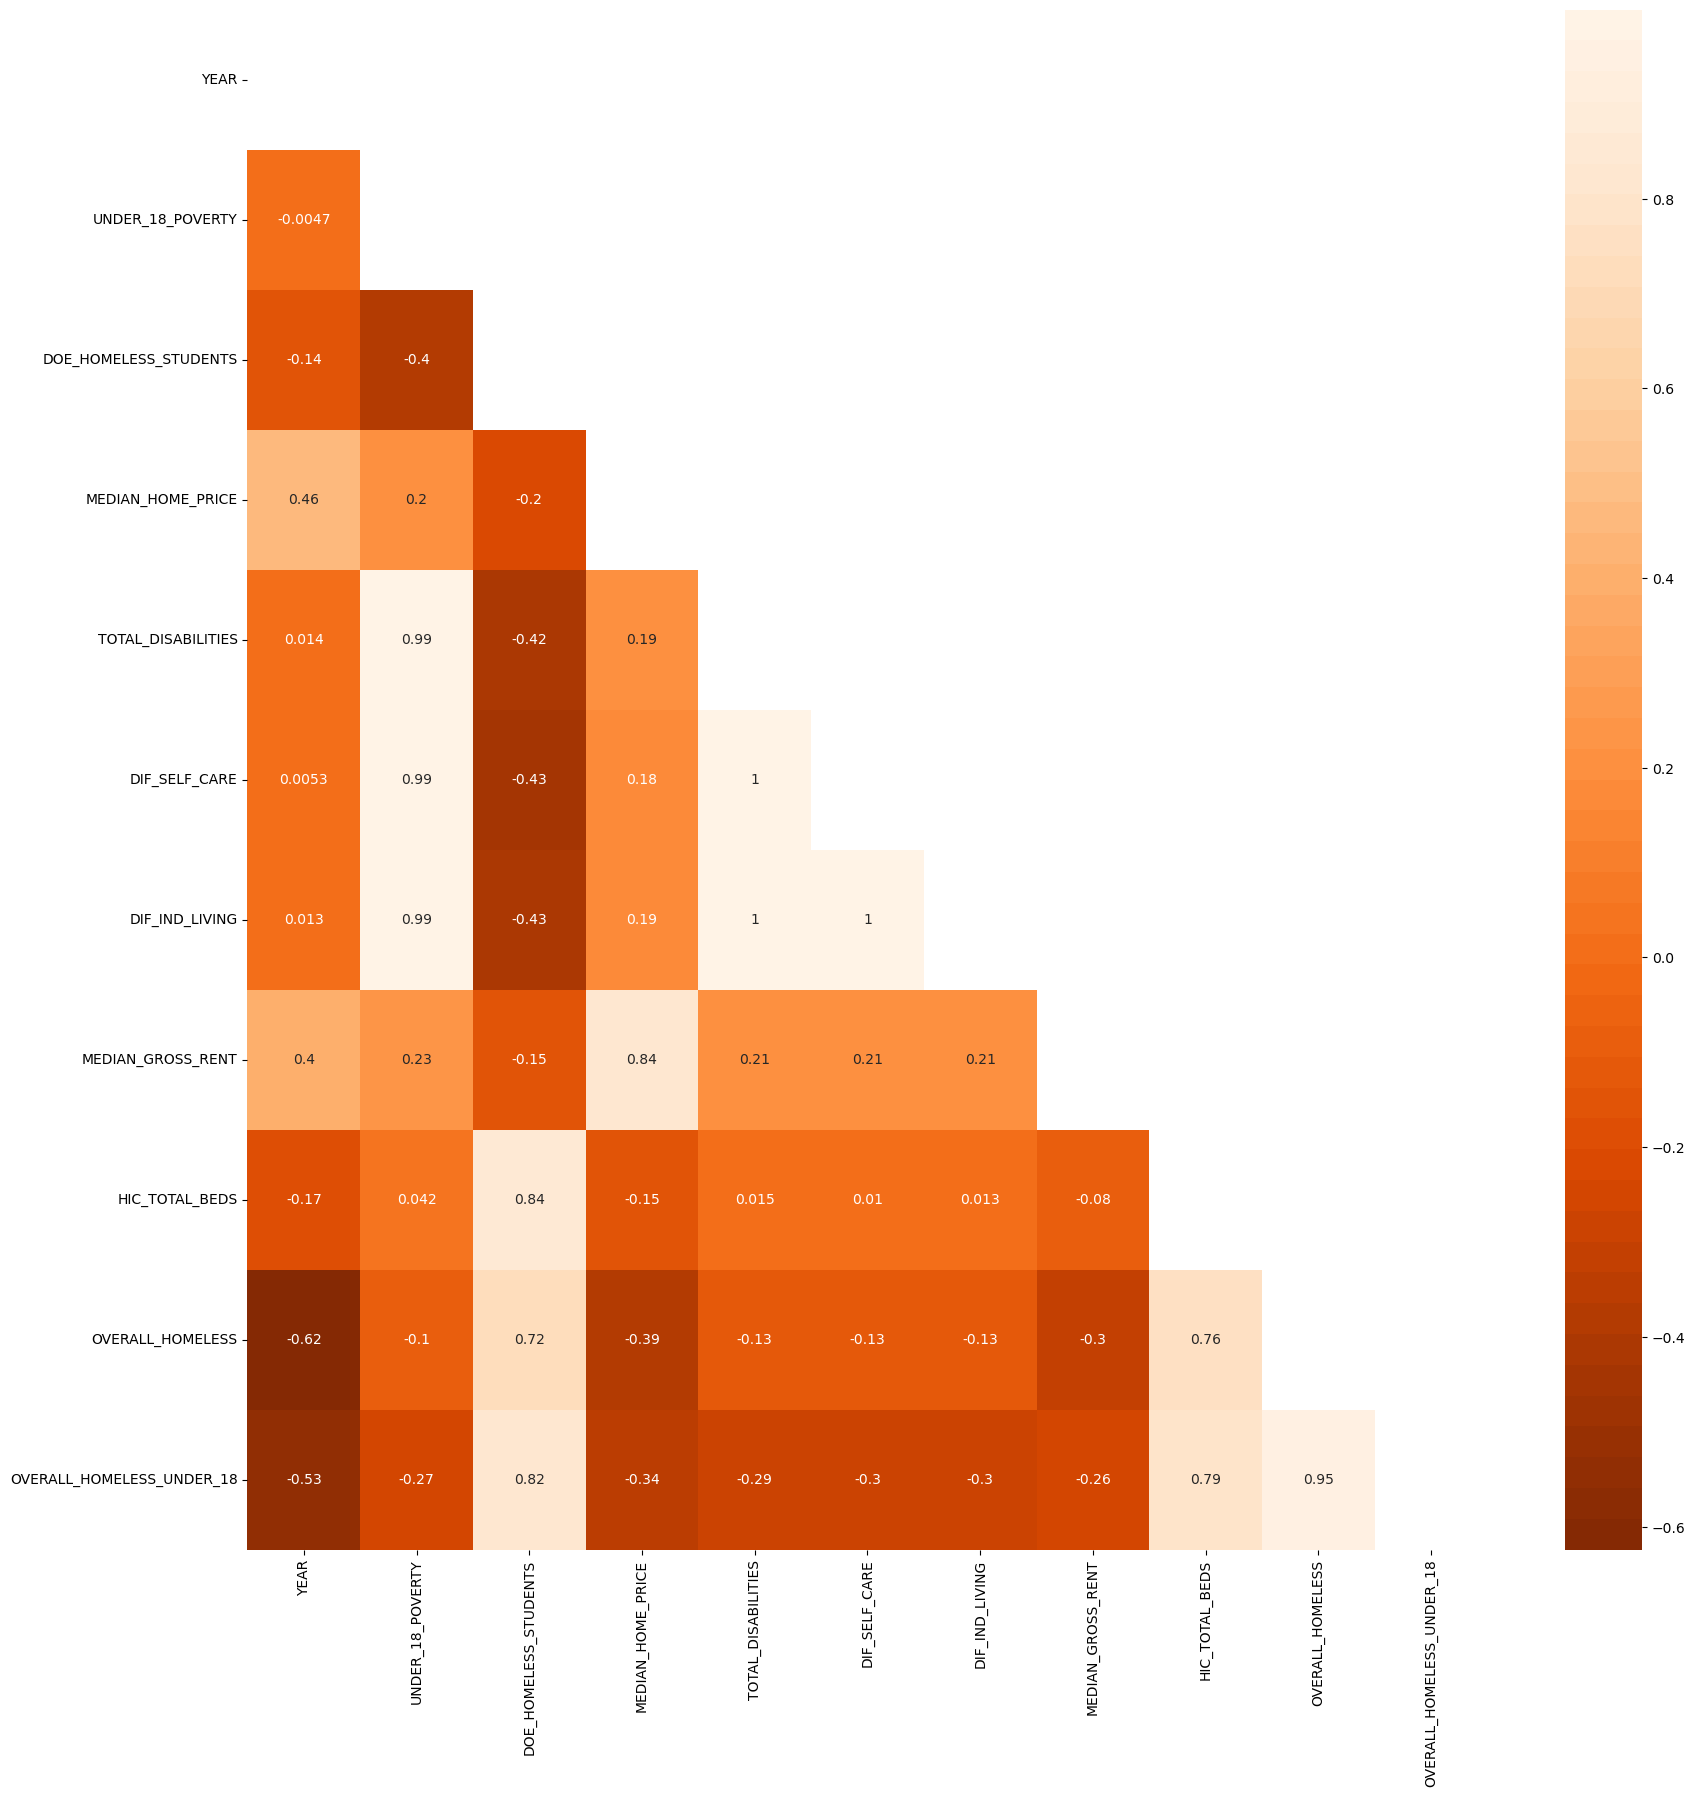

In [9]:
plt.figure(figsize=(20, 20))

mask = np.triu(np.ones_like(corr_df, dtype=bool))
cmap = sns.color_palette("Oranges_r", 50)
heatmap = sns.heatmap(corr_df, annot = True, mask=mask, cmap=cmap)

plt.show()

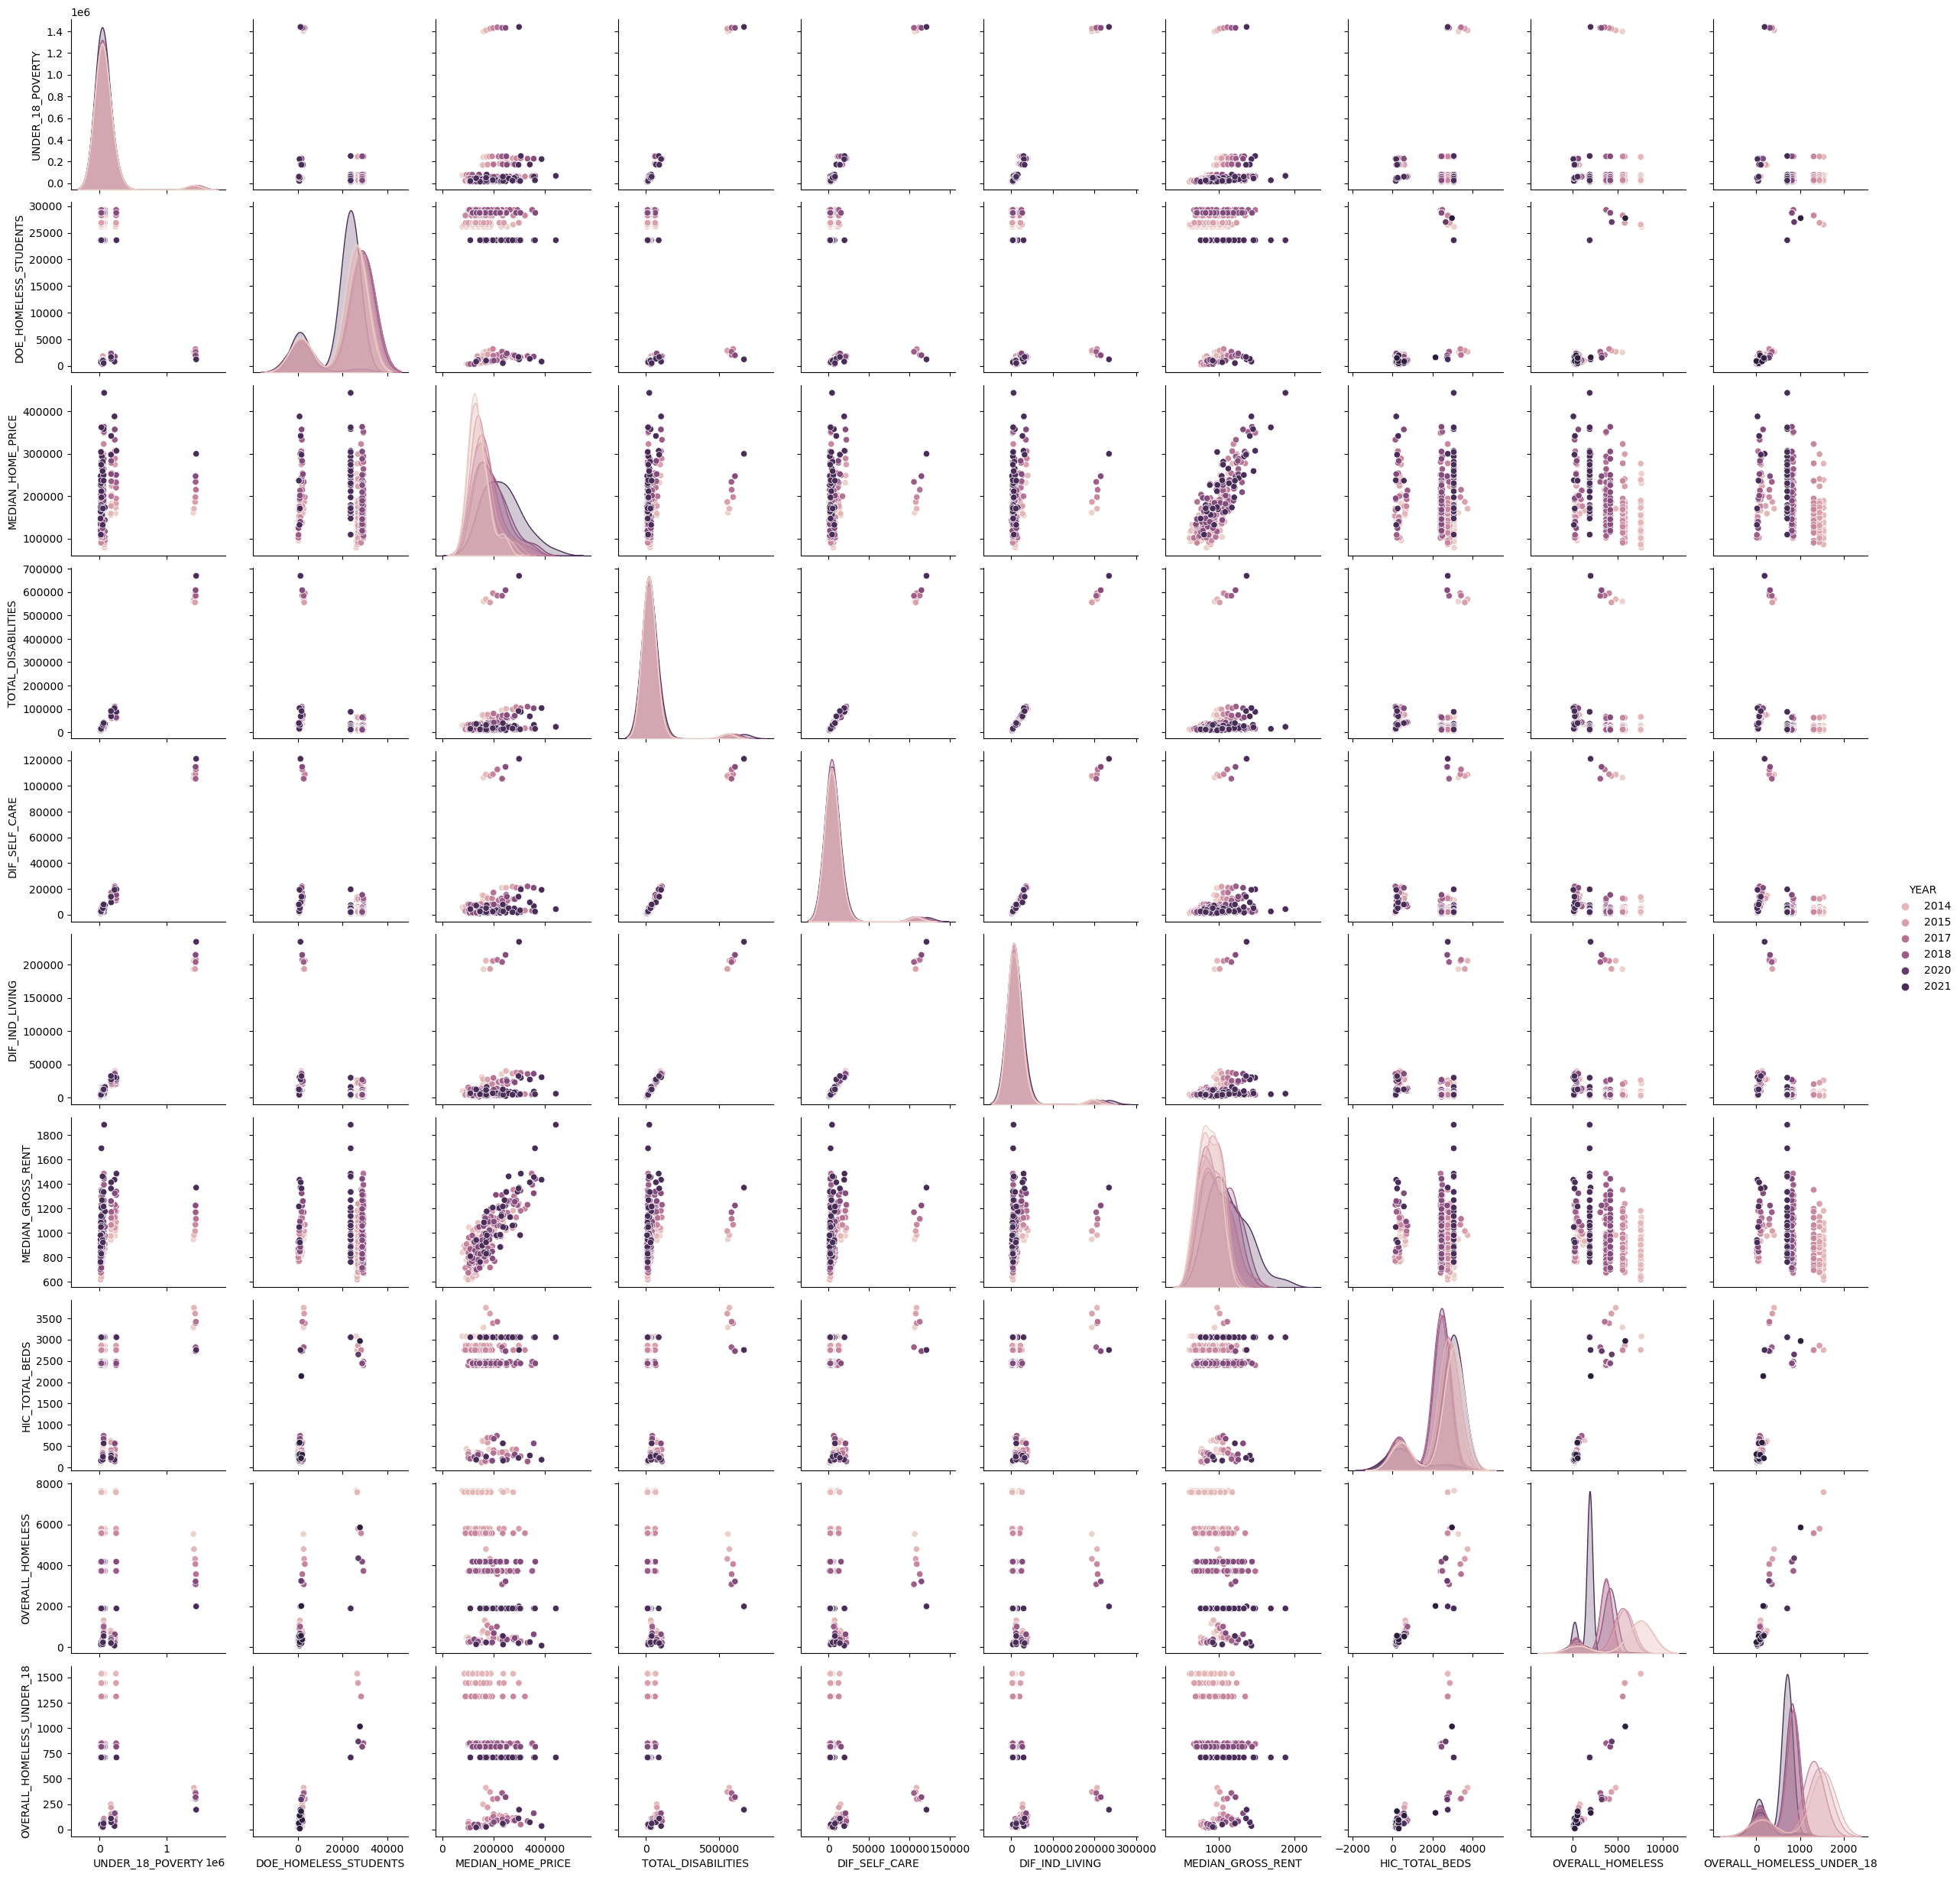

In [10]:
sns.pairplot(final_df, hue='YEAR')

In [11]:
def calculate_vif(X_df, thresh=5.0):
    X = X_df.copy()
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        
        X = add_constant(X, has_constant='add')
       
        temp_vif_df = pd.DataFrame({'feature':X.columns[1:], 'vif':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

        maxloc = temp_vif_df[['vif']].idxmax()[0]
        max_vif = temp_vif_df[['vif']].max()[0]
        max_feature = temp_vif_df[temp_vif_df['vif'] ==  max(temp_vif_df['vif'])]['feature'][maxloc]

        X = X.drop('const', axis =1)        
                                            
        # UNCOMMENT TO DISPLAY VIF TABLES    
        #display(temp_vif_df.sort_values('vif', ascending=False))
         
        if max_vif > thresh:
            print('\t\t\t\t\tDropping ' + max_feature + '\n\t\t\t\t\t\t\twith VIF: ' + str(max_vif.round(3)))
            X = X.drop(max_feature, axis =1)
            dropped = True

    return X

In [12]:
# TEST VIF HERE

calculate_vif(final_df[metrics], thresh=5.0)

MissingDataError: exog contains inf or nans

In [13]:
final_df.columns

Index(['YEAR', 'AREA', 'UNDER_18_POVERTY', 'COC', 'DOE_HOMELESS_STUDENTS',
       'MEDIAN_HOME_PRICE', 'TOTAL_DISABILITIES', 'DIF_SELF_CARE',
       'DIF_IND_LIVING', 'MEDIAN_GROSS_RENT', 'HIC_TOTAL_BEDS',
       'OVERALL_HOMELESS', 'OVERALL_HOMELESS_UNDER_18'],
      dtype='object')

In [32]:
ols_df = final_df.copy()

In [33]:
ols_df.isna().sum()

YEAR                          0
AREA                         18
UNDER_18_POVERTY             18
COC                           0
DOE_HOMELESS_STUDENTS         0
MEDIAN_HOME_PRICE            18
TOTAL_DISABILITIES           18
DIF_SELF_CARE                18
DIF_IND_LIVING               18
MEDIAN_GROSS_RENT            18
HIC_TOTAL_BEDS                0
OVERALL_HOMELESS              0
OVERALL_HOMELESS_UNDER_18    37
dtype: int64

In [16]:
ols_df = ols_df.dropna()

In [20]:
target = 'OVERALL_HOMELESS'
features = ['MEDIAN_GROSS_RENT', 
            'YEAR', 
            # 'UNDER_18_POVERTY',
            # 'DOE_HOMELESS_STUDENTS',
      #  'MEDIAN_HOME_PRICE', 
       'TOTAL_DISABILITIES', 
     #   'DIF_SELF_CARE', 'DIF_IND_LIVING', 
       
      #  'HIC_TOTAL_BEDS',
      #  'OVERALL_HOMELESS_UNDER_18',
       ]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       OVERALL_HOMELESS   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     45.23
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.43e-23
Time:                        17:44:33   Log-Likelihood:                -2360.2
No. Observations:                 265   AIC:                             4728.
Df Residuals:                     261   BIC:                             4743.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.117e+06   1.11e+05     10.087      0.000       9e+05    1.33e+06
MEDIAN_GROSS_RENT     -0.5823      0.466     -1.250      0.211      -1.495       0.331
YEAR                -551.2869     54.929    -10.036      0.000    -658.946    -443.627
TOTAL_DISABILITIES    -0.0026      0.001     -2.256      0.024      -0.005      -0.000
==============================================================================
Omnibus:                       66.255   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.126
Skew:                          -1.447   Prob(JB):                     1.22e-24
Kurtosis:                       4.264   Cond. No.                     9.91e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 9.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

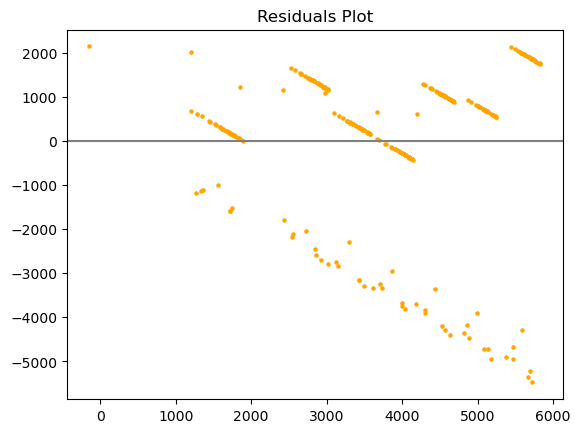

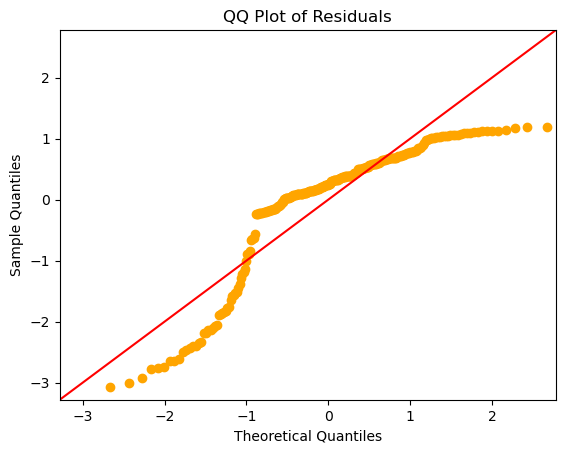

In [21]:
y = ols_df[target] ## Target varaibles
X = ols_df[features]

# adding the constant term
X = add_constant(X, has_constant='add')

# performing the regression
# and fitting the model
ols_model = sm.OLS(y, X).fit(cov_type='HC3')
# printing the summary table

display(ols_model.summary())


    
# View the residual plot of our data
plt.scatter(x = ols_model.fittedvalues, y = ols_model.resid, s = 5, c='orange' ) # s is for size
plt.axhline(y=0, color = 'grey')
plt.title("Residuals Plot")
plt.show()
                                                                
sm.qqplot(ols_model.resid, line = "45", fit = True, markerfacecolor='orange',  markeredgecolor='orange')
plt.title("QQ Plot of Residuals")
plt.show()

In [22]:
import lightgbm as lgbm
import shap

ImportError: cannot import name 'njit' from 'numba' (unknown location)

In [95]:
lgbm_model = lgbm.LGBMRegressor(random_state=42)

In [97]:
lgbm_model.fit(X,  y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 265, number of used features: 2
[LightGBM] [Info] Start training from score 3794.003774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor(random_state=42)

In [102]:
explainer = shap.Explainer(final_model)
shap_values = explainer(X_test)
shap_values.values_

NameError: name 'shap' is not defined

# Causal Impact - Bayesian Structural Time Series

In [73]:
# causal_df = final_df[(final_df['COC'] != 'GA-501')].reset_index(drop=True)
causal_df = final_df[(final_df['COC'] == 'GA-500')].reset_index(drop=True)

In [74]:
causal_df['COC'].value_counts()

GA-500    10
Name: COC, dtype: int64

In [75]:
causal_df['YEAR'].max()

2022

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
causal_df = causal_df[['YEAR','DOE_HOMELESS_STUDENTS', 'OVERALL_HOMELESS']]
display(causal_df)
causal_df.drop('YEAR', axis=1, inplace=True)

,YEAR,DOE_HOMELESS_STUDENTS,OVERALL_HOMELESS
0,2013,2549,5536.0
1,2014,2658,4797.0
2,2015,2880,4317.0
3,2016,3172,4063.0
4,2017,2065,3572.0
5,2018,2670,3076.0
6,2019,1993,3217.0
7,2020,1540,3240.0
8,2021,1230,1996.0
9,2022,1602,2017.0


In [78]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
causal_df = scaler.fit_transform(causal_df)

In [79]:
causal_df

array([[0.6791967 , 1.        ],
       [0.73532441, 0.79124294],
       [0.84963955, 0.65564972],
       [1.        , 0.58389831],
       [0.4299691 , 0.44519774],
       [0.7415036 , 0.30508475],
       [0.39289392, 0.34491525],
       [0.15962925, 0.35141243],
       [0.        , 0.        ],
       [0.1915551 , 0.0059322 ]])

In [81]:
# causal_df = causal_df[['DOE_HOMELESS_STUDENTS', 'OVERALL_HOMELESS']]

In [59]:
# SAMPLE DATA WHAT IT SHOULD LOOK LIKE WHERE Xs are COVARIATES

ll_ssm_sample = 1.42 * np.random.rand(100)

x0 = 100 * np.random.rand(100)
x1 = 90 * np.random.rand(100)
y = 1.2 * x0 + 0.9 * x1 + ll_ssm_sample
y[70:] += 10
data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])

# data.plot()
# plt.axvline(69, linestyle='--', color='k')
# plt.legend();
data

,y,x0,x1
0,102.502313,59.182363,34.451277
1,76.600138,63.372677,0.379667
2,143.091061,53.073202,87.788195
3,77.847387,45.382796,25.719261
4,151.944960,89.723360,48.845045
...,...,...,...
95,113.680487,32.952704,70.053607
96,198.052426,92.695529,84.461196
97,29.235052,9.570205,7.262078
98,99.406755,64.992148,11.581346


In [60]:
credible_interval = 0.05        

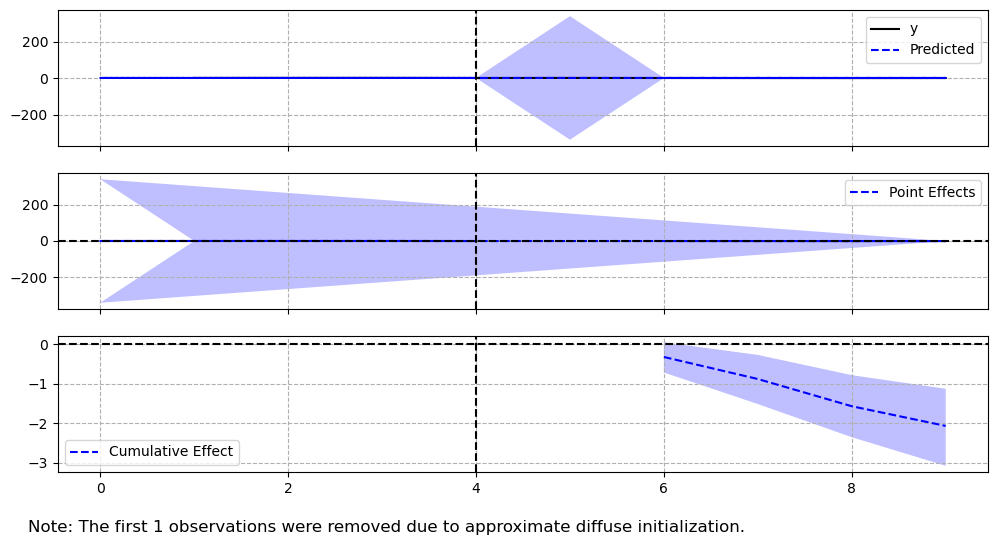

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 0.19. By contrast, in the absence of an
intervention, we would have expected an average response of 0.7.
The 95% interval of this counterfactual prediction is [0.47, 0.96].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.52 with a 95% interval of
[-0.77, -0.28]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 0.74.
By contrast, had the intervention not taken place, we would have expected
a sum of 2.81. The 95% interval of this prediction is [1.87, 3.82].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a d

In [82]:
causalimpact_df = pd.DataFrame()


        

    
# Setting parameters for the intervention
intervention_idx = 6
max_idx = 9
        
# Setting parameters for the intervention period
pre_period = [0, 6 - 1]
post_period = [intervention_idx, max_idx]        
        

            

ci = CausalImpact(causal_df, pre_period, post_period, alpha=credible_interval)

ci.plot(figsize=(12, 6))
print(ci.summary('report'))
                
effect = [x for x in ci.summary().split('\n')[6].split(" ") if x != ""][3]
lb = [x for x in ci.summary().split('\n')[7].split(" ") if x != ""][2].replace('[', '').replace(',', '') 
ub = [x for x in ci.summary().split('\n')[7].split(" ") if x != ""][3].replace(']', '')
p_val = [x for x in ci.summary().split('\n')[12].split(" ") if x != ""][4]     
                
if float(p_val) < 0.05:
    sig = 'YES'
else:
    sig = 'NO'           
                    
causalimpact_df = pd.DataFrame([{'EFFECT':effect, 'P':p_val  , '95_LB': lb , '95_UB': ub  , 'SIGNIFICANT':sig }])



In [83]:
causalimpact_df


,EFFECT,P,95_LB,95_UB,SIGNIFICANT
0,-0.52,0.0,-0.77,-0.28,YES


# Debiased Synthetic Control

In [94]:
synth_df = final_df[(final_df['COC'] == 'GA-500')].reset_index(drop=True)

In [95]:
alpha = 0.05

In [96]:
synth_df.columns

Index(['YEAR', 'AREA', 'UNDER_18_POVERTY', 'COC', 'DOE_HOMELESS_STUDENTS',
       'MEDIAN_HOME_PRICE', 'TOTAL_DISABILITIES', 'DIF_SELF_CARE',
       'DIF_IND_LIVING', 'MEDIAN_GROSS_RENT', 'HIC_TOTAL_BEDS',
       'OVERALL_HOMELESS', 'OVERALL_HOMELESS_UNDER_18'],
      dtype='object')

In [97]:
synth_df = synth_df[['YEAR','DOE_HOMELESS_STUDENTS', 'OVERALL_HOMELESS']]

In [98]:
synth_df

,YEAR,DOE_HOMELESS_STUDENTS,OVERALL_HOMELESS
0,2013,2549,5536.0
1,2014,2658,4797.0
2,2015,2880,4317.0
3,2016,3172,4063.0
4,2017,2065,3572.0
5,2018,2670,3076.0
6,2019,1993,3217.0
7,2020,1540,3240.0
8,2021,1230,1996.0
9,2022,1602,2017.0


In [99]:
class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, y_pre_co, y_pre_tr):
    
        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
        
        w = cp.Variable(y_pre_co.shape[1])
        
        objective = cp.Minimize(cp.sum_squares(y_pre_co@w - y_pre_tr))
        constraints = [cp.sum(w) == 1, w >= 0]
        
        problem = cp.Problem(objective, constraints)
        
        self.loss_ = problem.solve(max_iter = 100000, verbose=False)
        self.w_ = w.value
        
        self.is_fitted_ = True
        return self
    
    
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
    
        return y_co @ self.w_

In [124]:
def debiased_sc_atts(y_pre_co, y_pre_tr, y_post_co, y_post_tr, K=3):
                 
    block_size = int(min(np.floor(len(y_pre_tr)/K), len(y_post_tr)))
    blocks = np.split(y_pre_tr.index[-K*block_size:], K)
             
    def fold_effect(hold_out):
        model = SyntheticControl()
        model.fit(
                   y_pre_co.drop(hold_out),
                   y_pre_tr.drop(hold_out)
                 )
                 
        bias_hat = np.mean(y_pre_tr.loc[hold_out] - model.predict(y_pre_co.loc[hold_out]))
                 
        y0_hat = model.predict(y_post_co)
        return( (y_post_tr - y0_hat) - bias_hat).reshape(-1, 1)
             
             
    return pd.DataFrame([fold_effect(block) for block in blocks]).T

In [109]:
def reshape_sc_data(df: pd.DataFrame,
                            # geo_col: str, 
                            time_col: str,
                            y_col: str,
                            tr_geos: str,
                            tr_start: int):
            
    # df_pivot = df.pivot(time_col, geo_col, y_col)
    # df_pivot = df.pivot(time_col, y_col)

    
    y_co = df.drop(columns=tr_geos)
    y_tr = df[tr_geos]
    
    y_pre_co = y_co[df.index < tr_start]
    y_pre_tr = y_tr[df.index < tr_start]
    
    y_post_co = y_co[df.index >= tr_start]
    y_post_tr = y_tr[df.index >= tr_start]
    
    return y_pre_co, y_pre_tr, y_post_co, y_post_tr

In [125]:
synthetic_control_df = pd.DataFrame()





# Setting parameters for the intervention
tr_period = 2020

synth_df['POST'] = np.where(synth_df['YEAR']  >= tr_period , 1, 0)

y_co = synth_df['DOE_HOMELESS_STUDENTS']
y_tr = synth_df['OVERALL_HOMELESS']

y_pre_co = y_co[synth_df.index < tr_period]
y_pre_tr = y_tr[synth_df.index < tr_period]

y_post_co = y_co[synth_df.index >= tr_period]
y_post_tr = y_tr[synth_df.index >= tr_period]


deb_atts = debiased_sc_atts(y_pre_co,
                             y_pre_tr,
                             y_post_co,
                             y_post_tr,
                             K=2)

model = SyntheticControl()
model.fit(y_pre_co, y_pre_tr.mean(axis=1))

atts_k = deb_atts.mean(axis=0).values
att = np.mean(atts_k)
print("ATT:", att)

K = len(atts_k)
T0 = len(y_pre_co)
T1 = len(y_post_co)
block_size = min(np.floor(T0/K), T1)
se_hat=np.sqrt(1+((K*block_size)/T1))*np.std(atts_k, ddof=1)/np.sqrt(K)
lb = att - t.ppf(1-alpha/2, K-1)*se_hat
ub = att + t.ppf(1-alpha/2, K-1)*se_hat
ci = [lb, ub]

#         tt = t.ppf(1-(alpha/2), K-1)
#         pval = stats.t.sf(np.abs(tt), K-1)*2    
#         pval = np.exp(-0.7107 * (att/se_hat) - 0.416 * (att/se_hat) * (att/se_hat))

t_stat = (att - 0) / se_hat
p_val = 2 * (1 - t.cdf(abs(t_stat), K - 1)) 


print('PVAL:  ', p_val)
print('se_hat:  ', se_hat)
sc_results_df = pd.DataFrame({'EFFECT':[att], 'P':[p_val] , '95_LB':[lb], '95_UB': [ub]})


synthetic_control_df = pd.concat([synthetic_control_df, sc_results_df])

y_co = pd.concat([y_pre_co, y_post_co])
y_tr = pd.concat([y_pre_tr, y_post_tr]) 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6), sharex=True)

e = y_tr.mean(axis=1) - model.predict(y_co)
ax1.plot(y_co.index, model.predict(y_co), label="Synthetic Control")
ax1.plot(y_tr.mean(axis=1), label="Treated", ls="-.")
ax1.vlines(tr_period, y_tr.mean(axis=1).min(), y_tr.mean(axis=1).max(), ls="dashed", label="$T_0$")
ax1.legend()
ax1.set_ylabel("ATT")

ax2.plot(y_co.index, y_tr.mean(axis=1) - model.predict(y_co), label="Effect", ls="-.")
ax2.hlines(0, y_co.index.min(), y_co.index.max())
ax2.vlines(tr_period, e.min(), e.max(), label="$T_0$")
ax2.legend()
ax2.set_ylabel(f"{metric} EFFECT")

plt.xticks(rotation=45)
plt.show()
print("\n")

ValueError: Expected 2D array, got 1D array instead:
array=[2670 1993 1540 1230 1602].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.